In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams 
rcParams['figure.figsize'] = 500,100
import seaborn as sns
from math import sqrt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from google.colab import drive
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, r2_score
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn import metrics
from datetime import datetime
from datetime import date, datetime
from matplotlib import dates as mdates

In [ ]:
drive.mount('/content/drive',force_remount=True)
data = pd.read_csv('/content/drive/MyDrive/D2/US_counties_COVID19_health_weather_data.csv')

Mounted at /content/drive


In [ ]:
data.shape
num_fips = len(data['fips'].unique())
num_fips

3140

In [ ]:
covid = data[(data['fips']=='53061')]
covid.shape

(319, 227)

In [ ]:
covid.head()

date     county       state   fips  cases  deaths  \
0  2020-01-21  Snohomish  Washington  53061      1     0.0   
1  2020-01-22  Snohomish  Washington  53061      1     0.0   
2  2020-01-23  Snohomish  Washington  53061      1     0.0   
4  2020-01-24  Snohomish  Washington  53061      1     0.0   
7  2020-01-25  Snohomish  Washington  53061      1     0.0   

  stay_at_home_announced stay_at_home_effective        lat         lon  ...  \
0                     no                     no  48.047489 -121.697307  ...   
1                     no                     no  48.047489 -121.697307  ...   
2                     no                     no  48.047489 -121.697307  ...   
4                     no                     no  48.047489 -121.697307  ...   
7                     no                     no  48.047489 -121.697307  ...   

   min_temp_3d_avg  min_temp_5d_avg  min_temp_10d_avg  min_temp_15d_avg  \
0        38.266667            38.92             38.44         36.146667   
1        39.233333            41.12             39.76         37.613333   
2        42.900000            41.74             41.15         38.226667   
4        44.600000            42.54             41.75         38.226667   
7        44.000000            43.38             40.78         39.166667   

   dewpoint_3d_avg  dewpoint_5d_avg  dewpoint_10d_avg  dewpoint_15d_avg  \
0        40.333333            41.64             40.74         37.973333   
1        42.633333            42.98             41.68         39.440000   
2        44.733333            43.72             42.47         40.120000   
4        46.000000            44.30             42.88         41.293333   
7        44.633333            44.28             42.55         42.280000   

   date_stay_at_home_announced  date_stay_at_home_effective  
0                   2020-03-23                   2020-03-23  
1                   2020-03-23                   2020-03-23  
2                   2020-03-23                   2020-03-23  
4                   2020-03-23                   2020-03-23  
7                   2020-03-23                   2020-03-23  

[5 rows x 227 columns]

In [ ]:
covid['date'] = pd.to_datetime(covid['date'], infer_datetime_format=True)
dataset = covid.set_index(['date'])
dataset.head(100)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


county       state   fips  cases  deaths  \
date                                                      
2020-01-21  Snohomish  Washington  53061      1     0.0   
2020-01-22  Snohomish  Washington  53061      1     0.0   
2020-01-23  Snohomish  Washington  53061      1     0.0   
2020-01-24  Snohomish  Washington  53061      1     0.0   
2020-01-25  Snohomish  Washington  53061      1     0.0   
...               ...         ...    ...    ...     ...   
2020-04-25  Snohomish  Washington  53061   2297   103.0   
2020-04-26  Snohomish  Washington  53061   2311   104.0   
2020-04-27  Snohomish  Washington  53061   2355   106.0   
2020-04-28  Snohomish  Washington  53061   2370   106.0   
2020-04-29  Snohomish  Washington  53061   2416   106.0   

           stay_at_home_announced stay_at_home_effective        lat  \
date                                                                  
2020-01-21                     no                     no  48.047489   
2020-01-22                     no                     no  48.047489   
2020-01-23                     no                     no  48.047489   
2020-01-24                     no                     no  48.047489   
2020-01-25                     no                     no  48.047489   
...                           ...                    ...        ...   
2020-04-25                    yes                    yes  48.047489   
2020-04-26                    yes                    yes  48.047489   
2020-04-27                    yes                    yes  48.047489   
2020-04-28                    yes                    yes  48.047489   
2020-04-29                    yes                    yes  48.047489   

                   lon  total_population  ...  min_temp_3d_avg  \
date                                      ...                    
2020-01-21 -121.697307          758649.0  ...        38.266667   
2020-01-22 -121.697307          758649.0  ...        39.233333   
2020-01-23 -121.697307          758649.0  ...        42.900000   
2020-01-24 -121.697307          758649.0  ...        44.600000   
2020-01-25 -121.697307          758649.0  ...        44.000000   
...                ...               ...  ...              ...   
2020-04-25 -121.697307          758649.0  ...        44.600000   
2020-04-26 -121.697307          758649.0  ...        46.333333   
2020-04-27 -121.697307          758649.0  ...        46.033333   
2020-04-28 -121.697307          758649.0  ...        44.066667   
2020-04-29 -121.697307          758649.0  ...        44.066667   

            min_temp_5d_avg  min_temp_10d_avg  min_temp_15d_avg  \
date                                                              
2020-01-21            38.92             38.44         36.146667   
2020-01-22            41.12             39.76         37.613333   
2020-01-23            41.74             41.15         38.226667   
2020-01-24            42.54             41.75         38.226667   
2020-01-25            43.38             40.78         39.166667   
...                     ...               ...               ...   
2020-04-25            45.64             44.34         43.400000   
2020-04-26            44.78             44.54         43.140000   
2020-04-27            44.64             43.84         42.506667   
2020-04-28            45.64             43.61         42.380000   
2020-04-29            43.84             42.84         42.980000   

            dewpoint_3d_avg  dewpoint_5d_avg  dewpoint_10d_avg  \
date                                                             
2020-01-21        40.333333            41.64             40.74   
2020-01-22        42.633333            42.98             41.68   
2020-01-23        44.733333            43.72             42.47   
2020-01-24        46.000000            44.30             42.88   
2020-01-25        44.633333            44.28             42.55   
...                     ...              ...               ...   
2020-04-25        45.133333            45.84             46.23  

In [ ]:
dataset = dataset[['cases','deaths','stay_at_home_announced','stay_at_home_effective','mean_temp','dewpoint','sea_level_pressure','station_pressure','visibility','wind_speed','precipitation','fog','rain','snow','mean_temp_3d_avg','mean_temp_5d_avg','mean_temp_10d_avg','mean_temp_15d_avg','dewpoint_3d_avg','dewpoint_5d_avg','dewpoint_10d_avg','dewpoint_15d_avg']]
dataset.tail(5)
dataset.shape

(319, 22)

In [ ]:
dataset.apply(lambda x: len(x.unique()))

cases                     223
deaths                    133
stay_at_home_announced      2
stay_at_home_effective      2
mean_temp                 202
dewpoint                  199
sea_level_pressure        170
station_pressure          168
visibility                 47
wind_speed                 95
precipitation              50
fog                         2
rain                        2
snow                        2
mean_temp_3d_avg          264
mean_temp_5d_avg          291
mean_temp_10d_avg         298
mean_temp_15d_avg         299
dewpoint_3d_avg           284
dewpoint_5d_avg           287
dewpoint_10d_avg          292
dewpoint_15d_avg          298
dtype: int64

In [ ]:
dataset.isnull().sum()

cases                     0
deaths                    0
stay_at_home_announced    0
stay_at_home_effective    0
mean_temp                 0
dewpoint                  0
sea_level_pressure        0
station_pressure          2
visibility                0
wind_speed                0
precipitation             4
fog                       0
rain                      0
snow                      0
mean_temp_3d_avg          1
mean_temp_5d_avg          2
mean_temp_10d_avg         5
mean_temp_15d_avg         7
dewpoint_3d_avg           1
dewpoint_5d_avg           2
dewpoint_10d_avg          5
dewpoint_15d_avg          7
dtype: int64

In [ ]:
dataset['station_pressure'] = dataset['station_pressure'].replace(0, np.NaN)
dataset['station_pressure'].fillna(dataset['station_pressure'].mean(), inplace = True)

dataset['precipitation'] = dataset['precipitation'].replace(0, np.NaN)
dataset['precipitation'].fillna(dataset['precipitation'].mean(), inplace = True)

dataset['mean_temp_3d_avg'] = dataset['mean_temp_3d_avg'].replace(0, np.NaN)
dataset['mean_temp_3d_avg'].fillna(dataset['mean_temp_3d_avg'].mean(), inplace = True)

dataset['mean_temp_5d_avg'] = dataset['mean_temp_5d_avg'].replace(0, np.NaN)
dataset['mean_temp_5d_avg'].fillna(dataset['mean_temp_5d_avg'].mean(), inplace = True)

dataset['mean_temp_10d_avg'] = dataset['mean_temp_10d_avg'].replace(0, np.NaN)
dataset['mean_temp_10d_avg'].fillna(dataset['mean_temp_10d_avg'].mean(), inplace = True)

dataset['mean_temp_15d_avg'] = dataset['mean_temp_15d_avg'].replace(0, np.NaN)
dataset['mean_temp_15d_avg'].fillna(dataset['mean_temp_15d_avg'].mean(), inplace = True)

dataset['dewpoint_3d_avg'] = dataset['dewpoint_3d_avg'].replace(0, np.NaN)
dataset['dewpoint_3d_avg'].fillna(dataset['dewpoint_3d_avg'].mean(), inplace = True)

dataset['dewpoint_5d_avg'] = dataset['dewpoint_5d_avg'].replace(0, np.NaN)
dataset['dewpoint_5d_avg'].fillna(dataset['dewpoint_5d_avg'].mean(), inplace = True)

dataset['dewpoint_10d_avg'].fillna(dataset['dewpoint_10d_avg'].mode()[0], inplace = True)

dataset['dewpoint_15d_avg'] = dataset['dewpoint_15d_avg'].replace(0, np.NaN)
dataset['dewpoint_15d_avg'].fillna(dataset['dewpoint_15d_avg'].mode()[0], inplace = True)

dataset.isnull().sum()

cases                     0
deaths                    0
stay_at_home_announced    0
stay_at_home_effective    0
mean_temp                 0
dewpoint                  0
sea_level_pressure        0
station_pressure          0
visibility                0
wind_speed                0
precipitation             0
fog                       0
rain                      0
snow                      0
mean_temp_3d_avg          0
mean_temp_5d_avg          0
mean_temp_10d_avg         0
mean_temp_15d_avg         0
dewpoint_3d_avg           0
dewpoint_5d_avg           0
dewpoint_10d_avg          0
dewpoint_15d_avg          0
dtype: int64

In [ ]:
dataset.dtypes

cases                       int64
deaths                    float64
stay_at_home_announced     object
stay_at_home_effective     object
mean_temp                 float64
dewpoint                  float64
sea_level_pressure        float64
station_pressure          float64
visibility                float64
wind_speed                float64
precipitation             float64
fog                       float64
rain                      float64
snow                      float64
mean_temp_3d_avg          float64
mean_temp_5d_avg          float64
mean_temp_10d_avg         float64
mean_temp_15d_avg         float64
dewpoint_3d_avg           float64
dewpoint_5d_avg           float64
dewpoint_10d_avg          float64
dewpoint_15d_avg          float64
dtype: object

In [ ]:
# Import label encoder 
from sklearn import preprocessing
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'Country'. 
dataset['stay_at_home_announced']= label_encoder.fit_transform(dataset['stay_at_home_announced']) 
dataset['stay_at_home_effective']= label_encoder.fit_transform(dataset['stay_at_home_effective']) 
dataset.head(100)

cases  deaths  stay_at_home_announced  stay_at_home_effective  \
date                                                                        
2020-01-21      1     0.0                       0                       0   
2020-01-22      1     0.0                       0                       0   
2020-01-23      1     0.0                       0                       0   
2020-01-24      1     0.0                       0                       0   
2020-01-25      1     0.0                       0                       0   
...           ...     ...                     ...                     ...   
2020-04-25   2297   103.0                       1                       1   
2020-04-26   2311   104.0                       1                       1   
2020-04-27   2355   106.0                       1                       1   
2020-04-28   2370   106.0                       1                       1   
2020-04-29   2416   106.0                       1                       1   

            mean_temp  dewpoint  sea_level_pressure  station_pressure  \
date                                                                    
2020-01-21       44.1      40.3              1006.3               1.0   
2020-01-22       44.8      40.3              1014.3               8.5   
2020-01-23       49.9      47.3              1014.5               9.1   
2020-01-24       51.5      46.6              1011.9               6.4   
2020-01-25       47.1      44.1              1015.4              10.1   
...               ...       ...                 ...               ...   
2020-04-25       55.4      47.5              1017.9              12.5   
2020-04-26       53.5      42.9              1019.5              14.2   
2020-04-27       53.9      45.7              1015.2               9.6   
2020-04-28       51.0      46.9              1024.4              18.9   
2020-04-29       55.4      49.0              1017.4              12.2   

            visibility  wind_speed  ...  rain  snow  mean_temp_3d_avg  \
date                                ...                                 
2020-01-21         9.9         8.3  ...   1.0   0.0         44.900000   
2020-01-22         9.6        13.2  ...   1.0   0.0         46.266667   
2020-01-23        10.0        12.0  ...   1.0   0.0         48.733333   
2020-01-24         9.6        13.0  ...   1.0   0.0         49.500000   
2020-01-25         9.5         5.0  ...   1.0   0.0         48.666667   
...                ...         ...  ...   ...   ...               ...   
2020-04-25        10.0         7.3  ...   1.0   0.0         53.366667   
2020-04-26        10.0         6.3  ...   0.0   0.0         54.266667   
2020-04-27        10.0         8.2  ...   1.0   0.0         52.800000   
2020-04-28         9.0         2.5  ...   1.0   0.0         53.433333   
2020-04-29        10.0         6.2  ...   1.0   0.0         54.000000   

            mean_temp_5d_avg  mean_temp_10d_avg  mean_temp_15d_avg  \
date                                                                 
2020-01-21             46.02              45.12          42.753333   
2020-01-22             47.22              46.33          44.200000   
2020-01-23             47.48              46.89          44.620000   
2020-01-24             48.14              47.02          45.446667   
2020-01-25             48.64              46.34          46.480000   
...                      ...                ...                ...   
2020-04-25             52.86              52.92          52.833333   
2020-04-26             53.00              53.01          52.473333   
2020-04-27             53.84              53.19          52.200000   
2020-04-28             53.88              53.03          52.706667   
2020-04-29             53.60              52.81          52.993333   

            dewpoint_3d_avg  dewpoint_5d_avg  dewpoint_10d_avg  \
date                                                             
2020-01-21        40.333333            41.64             40.74   
2

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV

In [ ]:
df = dataset

In [ ]:
df.tail()

cases  deaths  stay_at_home_announced  stay_at_home_effective  \
date                                                                        
2020-11-30  15973   301.0                       1                       1   
2020-12-01  16234   305.0                       1                       1   
2020-12-02  16523   311.0                       1                       1   
2020-12-03  16678   314.0                       1                       1   
2020-12-04  16894   315.0                       1                       1   

            mean_temp  dewpoint  sea_level_pressure  station_pressure  \
date                                                                    
2020-11-30       45.5      38.2              1016.8              10.2   
2020-12-01       38.5      34.2              1034.4              31.0   
2020-12-02       35.2      31.5              1028.1              22.6   
2020-12-03       35.7      32.4              1025.1              19.4   
2020-12-04       38.1      36.1              1030.5              24.9   

            visibility  wind_speed  ...  rain  snow  mean_temp_3d_avg  \
date                                ...                                 
2020-11-30         9.8         8.2  ...   1.0   0.0         40.233333   
2020-12-01         9.1         2.7  ...   0.0   0.0         39.733333   
2020-12-02         7.0         1.7  ...   0.0   0.0         36.466667   
2020-12-03         9.3         2.1  ...   0.0   0.0         36.333333   
2020-12-04         9.9         0.9  ...   0.0   0.0         52.510901   

            mean_temp_5d_avg  mean_temp_10d_avg  mean_temp_15d_avg  \
date                                                                 
2020-11-30         40.400000          52.653694          52.698462   
2020-12-01         38.320000          52.653694          52.698462   
2020-12-02         38.600000          52.653694          52.698462   
2020-12-03         52.562587          52.653694          52.698462   
2020-12-04         52.562587          52.653694          52.698462   

            dewpoint_3d_avg  dewpoint_5d_avg  dewpoint_10d_avg  \
date                                                             
2020-11-30        35.400000        35.880000             37.55   
2020-12-01        34.633333        34.020000             37.55   
2020-12-02        32.700000        34.480000             37.55   
2020-12-03        33.333333        45.553628             37.55   
2020-12-04        45.514046        45.553628             37.55   

            dewpoint_15d_avg  
date                          
2020-11-30         34.953333  
2020-12-01         34.953333  
2020-12-02         34.953333  
2020-12-03         34.953333  
2020-12-04         34.953333  

[5 rows x 22 columns]

In [ ]:
df.shape

(319, 22)

In [ ]:
import seaborn as sns
df.corr()

cases    deaths  stay_at_home_announced  \
cases                   1.000000  0.926902                0.586744   
deaths                  0.926902  1.000000                0.767030   
stay_at_home_announced  0.586744  0.767030                1.000000   
stay_at_home_effective  0.586744  0.767030                1.000000   
mean_temp               0.136846  0.444634                0.567101   
dewpoint                0.212938  0.488660                0.524070   
sea_level_pressure     -0.005243 -0.070503               -0.179464   
station_pressure        0.150244  0.090893                0.054713   
visibility             -0.198659 -0.181269               -0.031972   
wind_speed             -0.109153 -0.166233               -0.114378   
precipitation          -0.106676 -0.110803               -0.148426   
fog                     0.188535  0.161362               -0.002905   
rain                   -0.098553 -0.170329               -0.147699   
snow                   -0.117368 -0.153126               -0.198375   
mean_temp_3d_avg        0.157116  0.472095                0.591849   
mean_temp_5d_avg        0.177556  0.495143                0.610119   
mean_temp_10d_avg       0.215675  0.531267                0.640402   
mean_temp_15d_avg       0.247070  0.560246                0.657350   
dewpoint_3d_avg         0.234537  0.519583                0.551176   
dewpoint_5d_avg         0.256492  0.546102                0.572300   
dewpoint_10d_avg        0.249121  0.556101                0.595463   
dewpoint_15d_avg        0.237731  0.554770                0.596842   

                        stay_at_home_effective  mean_temp  dewpoint  \
cases                                 0.586744   0.136846  0.212938   
deaths                                0.767030   0.444634  0.488660   
stay_at_home_announced                1.000000   0.567101  0.524070   
stay_at_home_effective                1.000000   0.567101  0.524070   
mean_temp                             0.567101   1.000000  0.919347   
dewpoint                              0.524070   0.919347  1.000000   
sea_level_pressure                   -0.179464  -0.307306 -0.317208   
station_pressure                      0.054713  -0.067663 -0.054043   
visibility                           -0.031972   0.011678 -0.146809   
wind_speed                           -0.114378   0.027319  0.018811   
precipitation                        -0.148426  -0.046088  0.021140   
fog                                  -0.002905  -0.055522  0.050356   
rain                                 -0.147699  -0.204449 -0.030064   
snow                                 -0.198375  -0.181407 -0.158334   
mean_temp_3d_avg                      0.591849   0.977661  0.907950   
mean_temp_5d_avg                      0.610119   0.951675  0.885553   
mean_temp_10d_avg                     0.640402   0.908862  0.840833   
mean_temp_15d_avg                     0.657350   0.895350  0.832126   
dewpoint_3d_avg                       0.551176   0.913970  0.977728   
dewpoint_5d_avg                       0.572300   0.897174  0.946040   
dewpoint_10d_avg                      0.595463   0.886469  0.906559   
dewpoint_15d_avg                      0.596842   0.884196  0.889329   

                        sea_level_pressure  station_pressure  visibility  \
cases                            -0.005243          0.150244   -0.198659   
deaths                           -0.070503          0.090893   -0.181269   
stay_at_home_announced           -0.179464          0.054713   -0.031972   
stay_at_home_effective           -0.179464          0.054713   -0.031972   
mean_temp                        -0.307306         -0.067663    0.011678   
dewpoint                         -0.317208         -0.054043   -0.146809   
sea_level_pressure                1.000000         -0.323841   -0.009014   
station_pressure                 -0.323841          1.000000   -0.002003   
visibility                       -0.009014         -0.002003    1.000000   
wind_speed            

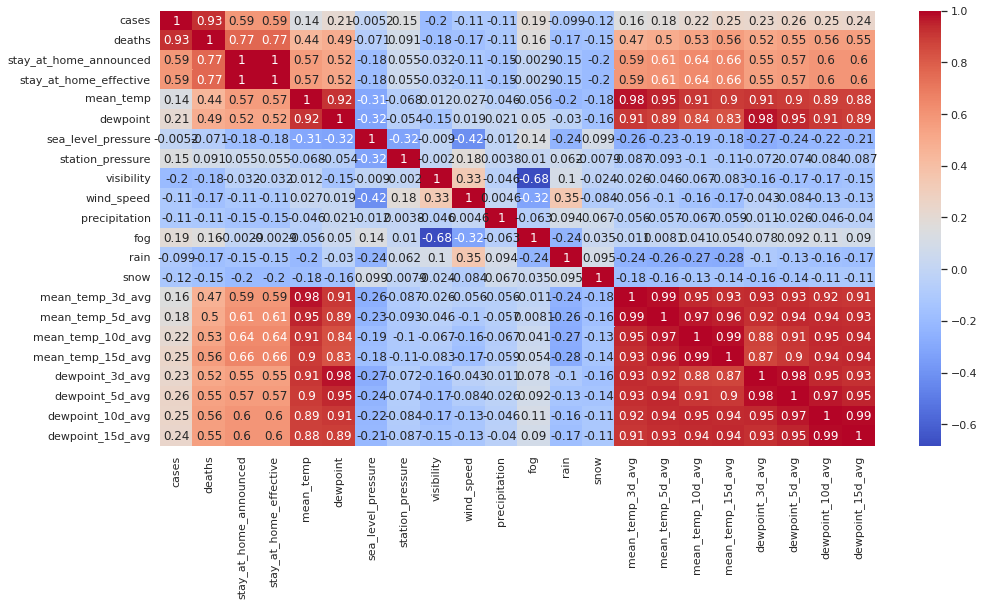

In [ ]:
sns.set(rc = {'figure.figsize':(16,8)})
sns.heatmap(df.corr(), annot = True, fmt='.2g',cmap= 'coolwarm')

In [ ]:
cor_matrix = df.corr().abs()
print(cor_matrix)

                           cases    deaths  stay_at_home_announced  \
cases                   1.000000  0.926902                0.586744   
deaths                  0.926902  1.000000                0.767030   
stay_at_home_announced  0.586744  0.767030                1.000000   
stay_at_home_effective  0.586744  0.767030                1.000000   
mean_temp               0.136846  0.444634                0.567101   
dewpoint                0.212938  0.488660                0.524070   
sea_level_pressure      0.005243  0.070503                0.179464   
station_pressure        0.150244  0.090893                0.054713   
visibility              0.198659  0.181269                0.031972   
wind_speed              0.109153  0.166233                0.114378   
precipitation           0.106676  0.110803                0.148426   
fog                     0.188535  0.161362                0.002905   
rain                    0.098553  0.170329                0.147699   
snow                

In [ ]:
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
print(upper_tri)

                        cases    deaths  stay_at_home_announced  \
cases                     NaN  0.926902                0.586744   
deaths                    NaN       NaN                0.767030   
stay_at_home_announced    NaN       NaN                     NaN   
stay_at_home_effective    NaN       NaN                     NaN   
mean_temp                 NaN       NaN                     NaN   
dewpoint                  NaN       NaN                     NaN   
sea_level_pressure        NaN       NaN                     NaN   
station_pressure          NaN       NaN                     NaN   
visibility                NaN       NaN                     NaN   
wind_speed                NaN       NaN                     NaN   
precipitation             NaN       NaN                     NaN   
fog                       NaN       NaN                     NaN   
rain                      NaN       NaN                     NaN   
snow                      NaN       NaN                     Na

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


In [ ]:
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
print(); print(to_drop)


['stay_at_home_effective', 'mean_temp_3d_avg', 'mean_temp_5d_avg', 'mean_temp_10d_avg', 'mean_temp_15d_avg', 'dewpoint_3d_avg', 'dewpoint_5d_avg', 'dewpoint_10d_avg', 'dewpoint_15d_avg']


In [ ]:
df = df.drop(columns=['stay_at_home_effective', 'mean_temp_3d_avg', 'mean_temp_5d_avg', 'mean_temp_10d_avg', 'mean_temp_15d_avg', 'dewpoint_3d_avg', 'dewpoint_5d_avg', 'dewpoint_10d_avg', 'dewpoint_15d_avg'])

In [ ]:
test_split=round(len(df)*0.20)
df_for_training=df[:-63]
df_for_testing=df[-63:]
print(df_for_training.shape)
print(df_for_testing.shape)

(256, 13)
(63, 13)


In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
df_for_training_scaled = scaler.fit_transform(df_for_training)
df_for_testing_scaled=scaler.transform(df_for_testing)
df_for_training_scaled

array([[0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.98671818, 0.98672566, 1.        , ..., 1.        , 0.        ,
        0.        ],
       [0.99251389, 0.98672566, 1.        , ..., 1.        , 0.        ,
        0.        ],
       [1.        , 0.98672566, 1.        , ..., 1.        , 0.        ,
        0.        ]])

In [ ]:
def createXY(dataset,n_past):
    dataX = []
    dataY = []
    for i in range(n_past, len(dataset)):
            dataX.append(dataset[i - n_past:i, 0:dataset.shape[1]])
            dataY.append(dataset[i,0])
    return np.array(dataX),np.array(dataY)

trainX,trainY=createXY(df_for_training_scaled,1)
testX,testY=createXY(df_for_testing_scaled,1)

In [ ]:
trainXS = trainX
trainXB = trainX
trainYS = trainY
trainYB = trainY
testXS = testX
testXB = testX
testYS = testY
testYB = testY

In [ ]:
trainX2=trainX3=trainX4=trainX5=trainX
trainY2=trainY3=trainY4=trainY5=trainY
testX2=testX3=testX4=testX5=testX
testY2=testY3=testY4=testY5=testY

In [ ]:
print("trainX Shape-- ",trainX.shape)
print("trainY Shape-- ",trainY.shape)
print("testX Shape-- ",testX.shape)
print("testY Shape-- ",testY.shape)
print("trainX[0]-- \n",trainX[0])
print("trainY[0]-- ",trainY[0])

trainX Shape--  (255, 1, 13)
trainY Shape--  (255,)
testX Shape--  (62, 1, 13)
testY Shape--  (62,)
trainX[0]-- 
 [[0.         0.         0.         0.27990971 0.4940048  0.05329154
  0.         0.98888889 0.44171779 0.10194805 0.         1.
  0.        ]]
trainY[0]--  0.0


LSTM

1

In [ ]:
def build_model(optimizer):
    grid_model = Sequential()
    grid_model.add(LSTM(96,return_sequences=True,input_shape=(1,13)))
    grid_model.add(LSTM(96))
    grid_model.add(Dropout(0.2))
    grid_model.add(Dense(1))
    grid_model.compile(loss = 'mse',optimizer = optimizer)
    return grid_model

grid_model = KerasRegressor(build_fn=build_model,verbose=1,validation_data=(testX,testY))

parameters = {'batch_size' : [9,11],
              'epochs' : [50,100],
              'optimizer' : ['adam','Adadelta'] }
    
grid_search  = GridSearchCV(estimator = grid_model,
                            param_grid = parameters,
                            cv = 2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
grid_search = grid_search.fit(trainX,trainY)

Epoch 1/50
15/15 [==============================] - 5s 94ms/step - loss: 0.3502 - val_loss: 1.1398
Epoch 2/50
15/15 [==============================] - 0s 7ms/step - loss: 0.0680 - val_loss: 0.2652
Epoch 3/50
15/15 [==============================] - 0s 7ms/step - loss: 0.0396 - val_loss: 0.5324
Epoch 4/50
15/15 [==============================] - 0s 8ms/step - loss: 0.0272 - val_loss: 0.4201
Epoch 5/50
15/15 [==============================] - 0s 7ms/step - loss: 0.0205 - val_loss: 0.4197
Epoch 6/50
15/15 [==============================] - 0s 8ms/step - loss: 0.0198 - val_loss: 0.3867
Epoch 7/50
15/15 [==============================] - 0s 8ms/step - loss: 0.0174 - val_loss: 0.3825
Epoch 8/50
15/15 [==============================] - 0s 8ms/step - loss: 0.0157 - val_loss: 0.3196
Epoch 9/50
15/15 [==============================] - 0s 7ms/step - loss: 0.0177 - val_loss: 0.3707
Epoch 10/50
15/15 [==============================] - 0s 7ms/step - loss: 0.0144 - val_loss: 0.2655
Epoch 11/50
15/15 

In [ ]:
grid_search.best_params_

{'batch_size': 9, 'epochs': 100, 'optimizer': 'adam'}

In [ ]:
my_model=grid_search.best_estimator_.model

In [ ]:
prediction1=my_model.predict(testX)
print("prediction\n", prediction1)
print("\nPrediction Shape-",prediction1.shape)

2/2 [==============================] - 1s 8ms/step
prediction
 [[1.0525335]
 [1.0454456]
 [1.0556675]
 [1.0683087]
 [1.0684268]
 [1.0714835]
 [1.0547938]
 [1.0543653]
 [1.0527159]
 [1.08292  ]
 [1.0883598]
 [1.1053324]
 [1.1174265]
 [1.1342218]
 [1.1290884]
 [1.1310201]
 [1.1575799]
 [1.1606463]
 [1.1781213]
 [1.202162 ]
 [1.1928825]
 [1.2068042]
 [1.1852852]
 [1.2265353]
 [1.2347691]
 [1.2556908]
 [1.2679435]
 [1.2889817]
 [1.2845147]
 [1.2889371]
 [1.3247387]
 [1.3261517]
 [1.3316348]
 [1.3741262]
 [1.3722341]
 [1.3907139]
 [1.3609314]
 [1.4306892]
 [1.4772148]
 [1.493273 ]
 [1.512752 ]
 [1.5268704]
 [1.5423827]
 [1.5455855]
 [1.6521297]
 [1.658292 ]
 [1.6830375]
 [1.7183933]
 [1.775608 ]
 [1.7579486]
 [1.7510635]
 [1.870986 ]
 [1.936522 ]
 [1.9555969]
 [1.9764411]
 [1.9784299]
 [1.9765489]
 [1.9634895]
 [2.1343105]
 [2.1922874]
 [2.2288766]
 [2.2259667]]

Prediction Shape- (62, 1)


In [ ]:
prediction_copies_array1 = np.repeat(prediction1,13, axis=-1)
prediction_copies_array1

array([[1.0525335, 1.0525335, 1.0525335, 1.0525335, 1.0525335, 1.0525335,
        1.0525335, 1.0525335, 1.0525335, 1.0525335, 1.0525335, 1.0525335,
        1.0525335],
       [1.0454456, 1.0454456, 1.0454456, 1.0454456, 1.0454456, 1.0454456,
        1.0454456, 1.0454456, 1.0454456, 1.0454456, 1.0454456, 1.0454456,
        1.0454456],
       [1.0556675, 1.0556675, 1.0556675, 1.0556675, 1.0556675, 1.0556675,
        1.0556675, 1.0556675, 1.0556675, 1.0556675, 1.0556675, 1.0556675,
        1.0556675],
       [1.0683087, 1.0683087, 1.0683087, 1.0683087, 1.0683087, 1.0683087,
        1.0683087, 1.0683087, 1.0683087, 1.0683087, 1.0683087, 1.0683087,
        1.0683087],
       [1.0684268, 1.0684268, 1.0684268, 1.0684268, 1.0684268, 1.0684268,
        1.0684268, 1.0684268, 1.0684268, 1.0684268, 1.0684268, 1.0684268,
        1.0684268],
       [1.0714835, 1.0714835, 1.0714835, 1.0714835, 1.0714835, 1.0714835,
        1.0714835, 1.0714835, 1.0714835, 1.0714835, 1.0714835, 1.0714835,
        1.07

In [ ]:
prediction_copies_array1.shape
pred1=scaler.inverse_transform(np.reshape(prediction_copies_array1,(len(prediction1),13)))[:,0]
original_copies_array = np.repeat(testY,13, axis=-1)
original=scaler.inverse_transform(np.reshape(original_copies_array,(len(testY),13)))[:,0]

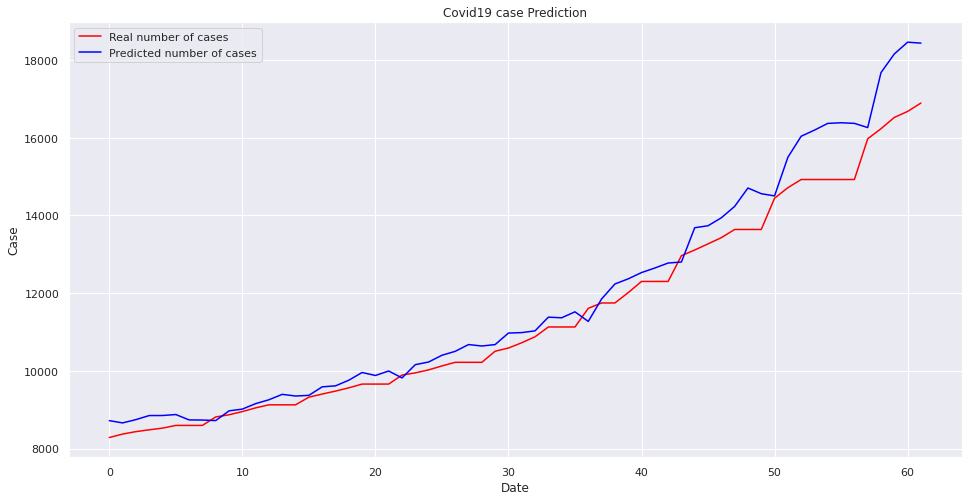

In [ ]:
plt.plot(original, color = 'red', label = 'Real number of cases')
plt.plot(pred1, color = 'blue', label = 'Predicted number of cases')
plt.title('Covid19 case Prediction')
plt.xlabel('Date')
plt.ylabel('Case')
plt.legend()
plt.show()

2

In [ ]:
def build_model(optimizer):
    grid_model = Sequential()
    grid_model.add(LSTM(96,return_sequences=True,input_shape=(1,13)))
    grid_model.add(LSTM(96))
    grid_model.add(Dropout(0.2))
    grid_model.add(Dense(1))
    grid_model.compile(loss = 'mse',optimizer = optimizer)
    return grid_model

grid_model = KerasRegressor(build_fn=build_model,verbose=1,validation_data=(testX,testY))

parameters = {'batch_size' : [9,11],
              'epochs' : [50,100],
              'optimizer' : ['adam','Adadelta'] }
    
grid_search  = GridSearchCV(estimator = grid_model,
                            param_grid = parameters,
                            cv = 2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
grid_search = grid_search.fit(trainX2,trainY2)

Epoch 1/50
15/15 [==============================] - 7s 149ms/step - loss: 0.3561 - val_loss: 1.1878
Epoch 2/50
15/15 [==============================] - 0s 23ms/step - loss: 0.0673 - val_loss: 0.2642
Epoch 3/50
15/15 [==============================] - 0s 21ms/step - loss: 0.0436 - val_loss: 0.5631
Epoch 4/50
15/15 [==============================] - 0s 17ms/step - loss: 0.0271 - val_loss: 0.4450
Epoch 5/50
15/15 [==============================] - 0s 7ms/step - loss: 0.0217 - val_loss: 0.4426
Epoch 6/50
15/15 [==============================] - 0s 8ms/step - loss: 0.0197 - val_loss: 0.4250
Epoch 7/50
15/15 [==============================] - 0s 8ms/step - loss: 0.0171 - val_loss: 0.3990
Epoch 8/50
15/15 [==============================] - 0s 11ms/step - loss: 0.0155 - val_loss: 0.3721
Epoch 9/50
15/15 [==============================] - 0s 15ms/step - loss: 0.0138 - val_loss: 0.3362
Epoch 10/50
15/15 [==============================] - 0s 13ms/step - loss: 0.0125 - val_loss: 0.3127
Epoch 11/50

In [ ]:
grid_search.best_params_
my_model=grid_search.best_estimator_.model

In [ ]:
prediction2=my_model.predict(testX2)
print("prediction\n", prediction2)
print("\nPrediction Shape-",prediction2.shape)

2/2 [==============================] - 3s 12ms/step
prediction
 [[1.0484455]
 [1.0502545]
 [1.0648776]
 [1.0733681]
 [1.0742565]
 [1.0832412]
 [1.0819982]
 [1.1021296]
 [1.0836253]
 [1.1085217]
 [1.1184802]
 [1.1338743]
 [1.1340892]
 [1.1597097]
 [1.1449585]
 [1.157925 ]
 [1.1741034]
 [1.182862 ]
 [1.2096609]
 [1.2254529]
 [1.2293134]
 [1.2479426]
 [1.2136021]
 [1.2518034]
 [1.2568035]
 [1.2804983]
 [1.2957971]
 [1.3310854]
 [1.318202 ]
 [1.3133123]
 [1.3493278]
 [1.3734887]
 [1.3845146]
 [1.4213817]
 [1.4155817]
 [1.4311277]
 [1.4089948]
 [1.4695747]
 [1.5277503]
 [1.5183082]
 [1.5577404]
 [1.6099417]
 [1.5987506]
 [1.6009614]
 [1.7081211]
 [1.7401707]
 [1.7665792]
 [1.7884712]
 [1.8413409]
 [1.8143094]
 [1.801951 ]
 [1.9284123]
 [2.0121975]
 [2.0171   ]
 [2.0278192]
 [2.0499167]
 [2.0347292]
 [2.0013015]
 [2.2156665]
 [2.257388 ]
 [2.2898223]
 [2.2888978]]

Prediction Shape- (62, 1)


In [ ]:
prediction_copies_array2 = np.repeat(prediction2,13, axis=-1)
prediction_copies_array2

array([[1.0484455, 1.0484455, 1.0484455, 1.0484455, 1.0484455, 1.0484455,
        1.0484455, 1.0484455, 1.0484455, 1.0484455, 1.0484455, 1.0484455,
        1.0484455],
       [1.0502545, 1.0502545, 1.0502545, 1.0502545, 1.0502545, 1.0502545,
        1.0502545, 1.0502545, 1.0502545, 1.0502545, 1.0502545, 1.0502545,
        1.0502545],
       [1.0648776, 1.0648776, 1.0648776, 1.0648776, 1.0648776, 1.0648776,
        1.0648776, 1.0648776, 1.0648776, 1.0648776, 1.0648776, 1.0648776,
        1.0648776],
       [1.0733681, 1.0733681, 1.0733681, 1.0733681, 1.0733681, 1.0733681,
        1.0733681, 1.0733681, 1.0733681, 1.0733681, 1.0733681, 1.0733681,
        1.0733681],
       [1.0742565, 1.0742565, 1.0742565, 1.0742565, 1.0742565, 1.0742565,
        1.0742565, 1.0742565, 1.0742565, 1.0742565, 1.0742565, 1.0742565,
        1.0742565],
       [1.0832412, 1.0832412, 1.0832412, 1.0832412, 1.0832412, 1.0832412,
        1.0832412, 1.0832412, 1.0832412, 1.0832412, 1.0832412, 1.0832412,
        1.08

In [ ]:
prediction_copies_array2.shape
pred2=scaler.inverse_transform(np.reshape(prediction_copies_array2,(len(prediction2),13)))[:,0]
original_copies_array = np.repeat(testY2,13, axis=-1)
original=scaler.inverse_transform(np.reshape(original_copies_array,(len(testY2),13)))[:,0]

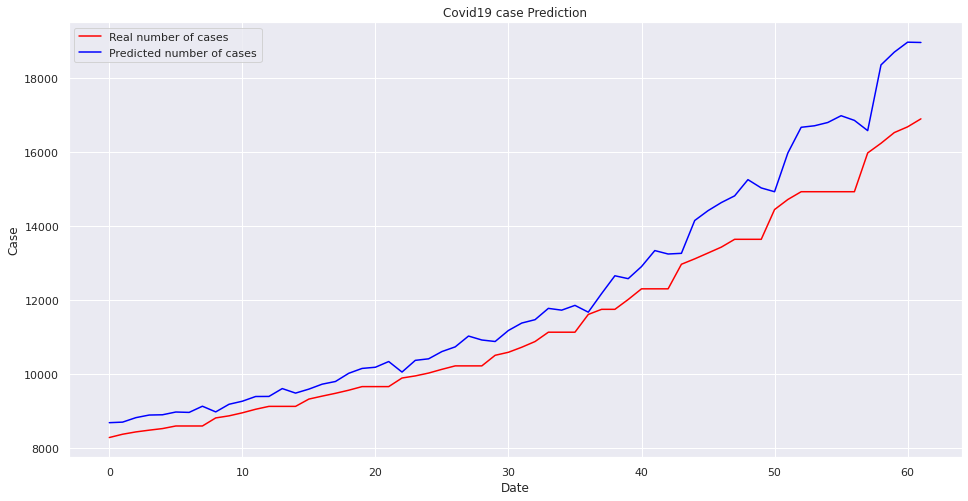

In [ ]:
plt.plot(original, color = 'red', label = 'Real number of cases')
plt.plot(pred2, color = 'blue', label = 'Predicted number of cases')
plt.title('Covid19 case Prediction')
plt.xlabel('Date')
plt.ylabel('Case')
plt.legend()
plt.show()

3

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  # Remove the CWD from sys.path while we load stuff.


Epoch 1/50
15/15 [==============================] - 5s 73ms/step - loss: 0.3451 - val_loss: 1.1446
Epoch 2/50
15/15 [==============================] - 0s 7ms/step - loss: 0.0625 - val_loss: 0.3060
Epoch 3/50
15/15 [==============================] - 0s 8ms/step - loss: 0.0333 - val_loss: 0.5288
Epoch 4/50
15/15 [==============================] - 0s 7ms/step - loss: 0.0242 - val_loss: 0.4583
Epoch 5/50
15/15 [==============================] - 0s 7ms/step - loss: 0.0175 - val_loss: 0.4354
Epoch 6/50
15/15 [==============================] - 0s 7ms/step - loss: 0.0183 - val_loss: 0.4072
Epoch 7/50
15/15 [==============================] - 0s 9ms/step - loss: 0.0169 - val_loss: 0.3648
Epoch 8/50
15/15 [==============================] - 0s 7ms/step - loss: 0.0129 - val_loss: 0.3760
Epoch 9/50
15/15 [==============================] - 0s 8ms/step - loss: 0.0148 - val_loss: 0.3099
Epoch 10/50
15/15 [==============================] - 0s 7ms/step - loss: 0.0120 - val_loss: 0.2955
Epoch 11/50
15/15 

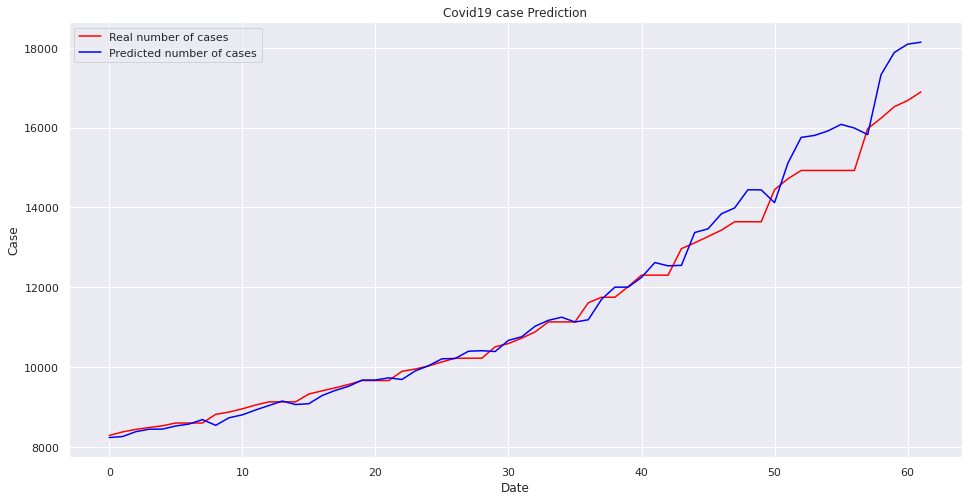

In [ ]:
def build_model(optimizer):
    grid_model = Sequential()
    grid_model.add(LSTM(96,return_sequences=True,input_shape=(1,13)))
    grid_model.add(LSTM(96))
    grid_model.add(Dropout(0.2))
    grid_model.add(Dense(1))
    grid_model.compile(loss = 'mse',optimizer = optimizer)
    return grid_model

grid_model = KerasRegressor(build_fn=build_model,verbose=1,validation_data=(testX,testY))

parameters = {'batch_size' : [9,11],
              'epochs' : [50,100],
              'optimizer' : ['adam','Adadelta'] }
    
grid_search  = GridSearchCV(estimator = grid_model,
                            param_grid = parameters,
                            cv = 2)

grid_search = grid_search.fit(trainX3,trainY3)

grid_search.best_params_
my_model=grid_search.best_estimator_.model

prediction3=my_model.predict(testX3)
print("prediction\n", prediction3)
print("\nPrediction Shape-",prediction3.shape)

prediction_copies_array3 = np.repeat(prediction3,13, axis=-1)
prediction_copies_array3

prediction_copies_array3.shape
pred3=scaler.inverse_transform(np.reshape(prediction_copies_array3,(len(prediction3),13)))[:,0]
original_copies_array = np.repeat(testY3,13, axis=-1)
original=scaler.inverse_transform(np.reshape(original_copies_array,(len(testY3),13)))[:,0]

plt.plot(original, color = 'red', label = 'Real number of cases')
plt.plot(pred3, color = 'blue', label = 'Predicted number of cases')
plt.title('Covid19 case Prediction')
plt.xlabel('Date')
plt.ylabel('Case')
plt.legend()
plt.show()

4

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  # Remove the CWD from sys.path while we load stuff.


Epoch 1/50
15/15 [==============================] - 6s 74ms/step - loss: 0.3468 - val_loss: 1.1324
Epoch 2/50
15/15 [==============================] - 0s 7ms/step - loss: 0.0646 - val_loss: 0.3032
Epoch 3/50
15/15 [==============================] - 0s 8ms/step - loss: 0.0364 - val_loss: 0.5521
Epoch 4/50
15/15 [==============================] - 0s 7ms/step - loss: 0.0246 - val_loss: 0.4280
Epoch 5/50
15/15 [==============================] - 0s 7ms/step - loss: 0.0208 - val_loss: 0.4600
Epoch 6/50
15/15 [==============================] - 0s 7ms/step - loss: 0.0183 - val_loss: 0.4053
Epoch 7/50
15/15 [==============================] - 0s 8ms/step - loss: 0.0160 - val_loss: 0.4179
Epoch 8/50
15/15 [==============================] - 0s 8ms/step - loss: 0.0167 - val_loss: 0.3465
Epoch 9/50
15/15 [==============================] - 0s 7ms/step - loss: 0.0146 - val_loss: 0.3278
Epoch 10/50
15/15 [==============================] - 0s 7ms/step - loss: 0.0126 - val_loss: 0.2794
Epoch 11/50
15/15 

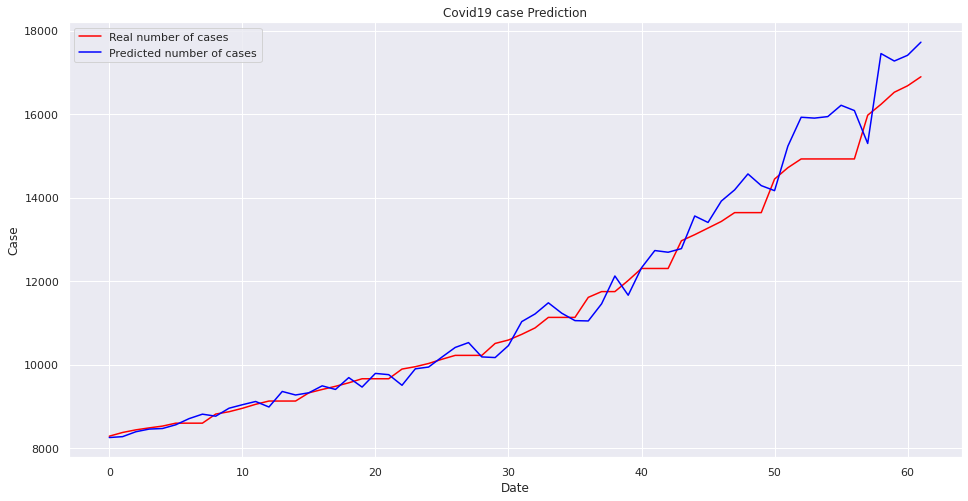

In [ ]:
def build_model(optimizer):
    grid_model = Sequential()
    grid_model.add(LSTM(96,return_sequences=True,input_shape=(1,13)))
    grid_model.add(LSTM(96))
    grid_model.add(Dropout(0.2))
    grid_model.add(Dense(1))
    grid_model.compile(loss = 'mse',optimizer = optimizer)
    return grid_model

grid_model = KerasRegressor(build_fn=build_model,verbose=1,validation_data=(testX,testY))

parameters = {'batch_size' : [9,11],
              'epochs' : [50,100],
              'optimizer' : ['adam','Adadelta'] }
    
grid_search  = GridSearchCV(estimator = grid_model,
                            param_grid = parameters,
                            cv = 2)

grid_search = grid_search.fit(trainX4,trainY4)

grid_search.best_params_
my_model=grid_search.best_estimator_.model

prediction4=my_model.predict(testX4)
print("prediction\n", prediction4)
print("\nPrediction Shape-",prediction4.shape)

prediction_copies_array4 = np.repeat(prediction4,13, axis=-1)
prediction_copies_array4

prediction_copies_array4.shape
pred4=scaler.inverse_transform(np.reshape(prediction_copies_array4,(len(prediction4),13)))[:,0]
original_copies_array = np.repeat(testY4,13, axis=-1)
original=scaler.inverse_transform(np.reshape(original_copies_array,(len(testY4),13)))[:,0]

plt.plot(original, color = 'red', label = 'Real number of cases')
plt.plot(pred4, color = 'blue', label = 'Predicted number of cases')
plt.title('Covid19 case Prediction')
plt.xlabel('Date')
plt.ylabel('Case')
plt.legend()
plt.show()

5

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  # Remove the CWD from sys.path while we load stuff.


Epoch 1/50
15/15 [==============================] - 8s 294ms/step - loss: 0.3514 - val_loss: 1.1493
Epoch 2/50
15/15 [==============================] - 0s 12ms/step - loss: 0.0745 - val_loss: 0.3203
Epoch 3/50
15/15 [==============================] - 0s 14ms/step - loss: 0.0327 - val_loss: 0.5329
Epoch 4/50
15/15 [==============================] - 0s 13ms/step - loss: 0.0237 - val_loss: 0.4316
Epoch 5/50
15/15 [==============================] - 0s 16ms/step - loss: 0.0208 - val_loss: 0.4362
Epoch 6/50
15/15 [==============================] - 0s 15ms/step - loss: 0.0207 - val_loss: 0.3991
Epoch 7/50
15/15 [==============================] - 0s 19ms/step - loss: 0.0154 - val_loss: 0.3807
Epoch 8/50
15/15 [==============================] - 0s 12ms/step - loss: 0.0145 - val_loss: 0.3633
Epoch 9/50
15/15 [==============================] - 0s 15ms/step - loss: 0.0135 - val_loss: 0.3524
Epoch 10/50
15/15 [==============================] - 0s 16ms/step - loss: 0.0133 - val_loss: 0.2451
Epoch 11

2/2 [==============================] - 1s 9ms/step
prediction
 [[1.0058272]
 [1.0049568]
 [1.0176587]
 [1.0261478]
 [1.0277312]
 [1.035502 ]
 [1.0373087]
 [1.0331142]
 [1.0253627]
 [1.051575 ]
 [1.0584751]
 [1.072097 ]
 [1.0904567]
 [1.0951216]
 [1.0876973]
 [1.0958953]
 [1.1155603]
 [1.1369159]
 [1.1430517]
 [1.155886 ]
 [1.1581774]
 [1.156898 ]
 [1.1611025]
 [1.180238 ]
 [1.2058663]
 [1.2280426]
 [1.2248175]
 [1.2381302]
 [1.240355 ]
 [1.2387841]
 [1.2742178]
 [1.2904463]
 [1.3111479]
 [1.3324164]
 [1.3530843]
 [1.3237574]
 [1.3454487]
 [1.3998775]
 [1.4318779]
 [1.4256606]
 [1.460842 ]
 [1.50179  ]
 [1.4978133]
 [1.5016938]
 [1.597743 ]
 [1.5988598]
 [1.6463252]
 [1.6671448]
 [1.7116507]
 [1.7176464]
 [1.6835873]
 [1.8017834]
 [1.8717726]
 [1.8813019]
 [1.8883647]
 [1.9043125]
 [1.8961201]
 [1.8671448]
 [2.0594509]
 [2.09651  ]
 [2.1236527]
 [2.1584249]]

Prediction Shape- (62, 1)


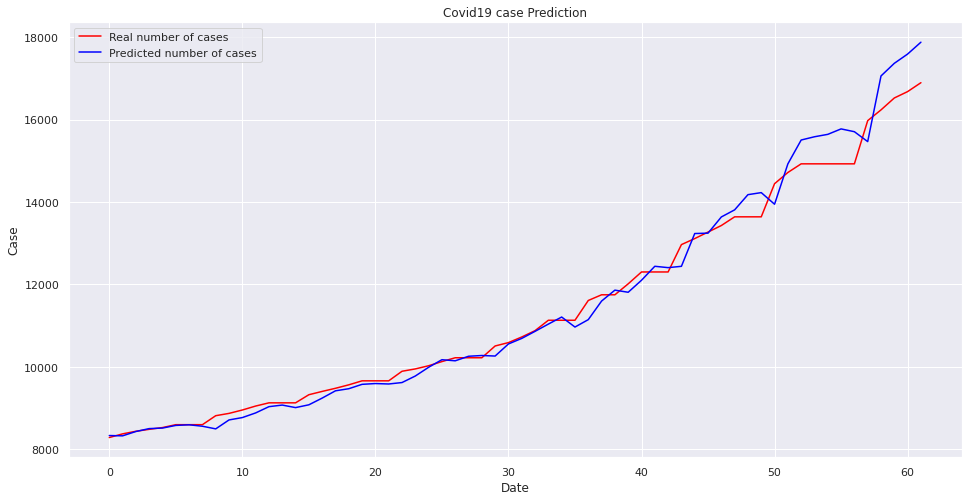

In [ ]:
def build_model(optimizer):
    grid_model = Sequential()
    grid_model.add(LSTM(96,return_sequences=True,input_shape=(1,13)))
    grid_model.add(LSTM(96))
    grid_model.add(Dropout(0.2))
    grid_model.add(Dense(1))
    grid_model.compile(loss = 'mse',optimizer = optimizer)
    return grid_model

grid_model = KerasRegressor(build_fn=build_model,verbose=1,validation_data=(testX,testY))

parameters = {'batch_size' : [9,11],
              'epochs' : [50,100],
              'optimizer' : ['adam','Adadelta'] }
    
grid_search  = GridSearchCV(estimator = grid_model,
                            param_grid = parameters,
                            cv = 2)

grid_search = grid_search.fit(trainX5,trainY5)

grid_search.best_params_
my_model=grid_search.best_estimator_.model

prediction5=my_model.predict(testX5)
print("prediction\n", prediction5)
print("\nPrediction Shape-",prediction5.shape)

prediction_copies_array5 = np.repeat(prediction5,13, axis=-1)
prediction_copies_array5

prediction_copies_array5.shape
pred5=scaler.inverse_transform(np.reshape(prediction_copies_array5,(len(prediction5),13)))[:,0]
original_copies_array = np.repeat(testY5,13, axis=-1)
original=scaler.inverse_transform(np.reshape(original_copies_array,(len(testY5),13)))[:,0]

plt.plot(original, color = 'red', label = 'Real number of cases')
plt.plot(pred5, color = 'blue', label = 'Predicted number of cases')
plt.title('Covid19 case Prediction')
plt.xlabel('Date')
plt.ylabel('Case')
plt.legend()
plt.show()

Average of 5 LSTM runs

In [ ]:
predlstm = (pred1+pred2+pred3+pred4+pred5)/5
print(predlstm)

[ 8443.061   8442.19    8552.284   8626.391   8633.986   8700.41
  8712.784   8781.9375  8697.455   8908.179   8976.519   9092.729
  9139.375   9314.106   9234.745   9287.644   9465.239   9528.931
  9689.537   9762.591   9822.764   9879.769   9735.127  10020.293
 10119.246  10311.972  10400.266  10575.172  10484.071  10473.625
 10764.628  10966.742  11117.705  11367.38   11355.037  11302.956
 11262.581  11753.296  12173.944  12082.658  12418.553  12753.382
 12729.339  12764.642  13598.565  13651.162  13992.221  14204.653
 14628.442  14507.475  14331.266  15345.885  15977.1875 16038.325
 16131.891  16285.6455 16200.073  15884.627  17571.535  17874.38
 18102.77   18226.678 ]


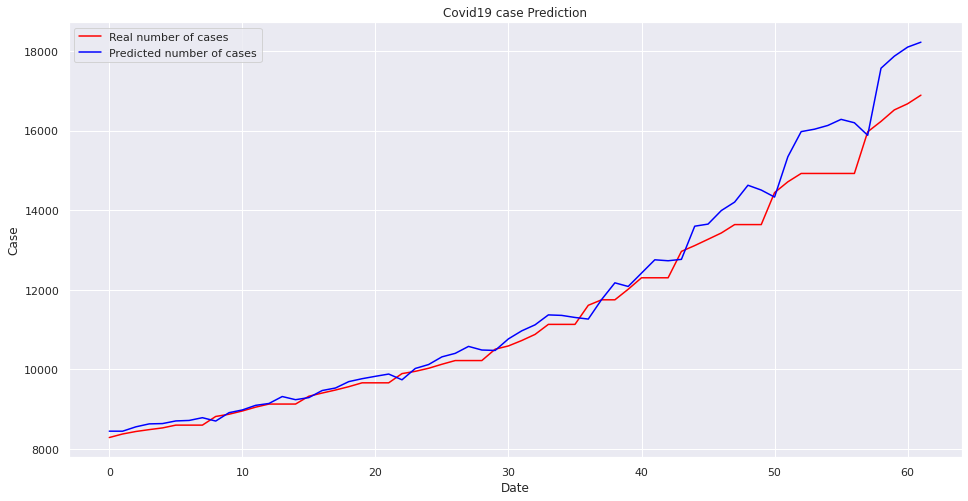

In [ ]:
plt.plot(original, color = 'red', label = 'Real number of cases')
plt.plot(predlstm, color = 'blue', label = 'Predicted number of cases')
plt.title('Covid19 case Prediction')
plt.xlabel('Date')
plt.ylabel('Case')
plt.legend()
plt.show()

In [ ]:
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(original, predlstm)))
print("MAE:",metrics.mean_absolute_error(original, predlstm))
print("MSE:",metrics.mean_squared_error(original, predlstm))
print("MAPE: ",MAPE(original,predlstm))

forecast_errors = [original[i]-predlstm[i] for i in range(len(original))]
print('Forecast Errors: %s' % forecast_errors)
bias = sum(forecast_errors) * 1.0/len(original)
print('Bias: %f' % bias)

print("std of LSTM : ", np.std(predlstm))

RMSE : 561.2
MAE: 373.3562720514113
MSE: 314974.63726371335
MAPE:  2.825618381005344
Forecast Errors: [-160.060546875, -70.1904296875, -117.2841796875, -144.390625, -108.986328125, -105.41015625, -117.7841796875, -186.9375, 115.544921875, -39.1787109375, -25.5185546875, -45.728515625, -14.375, -189.1064453125, -109.7451171875, 34.3564453125, -63.2392578125, -50.9306640625, -127.537109375, -103.5908203125, -163.763671875, -220.7685546875, 155.873046875, -72.29296875, -94.24609375, -185.9716796875, -181.265625, -356.171875, -265.0712890625, 31.375, -177.6279296875, -243.7421875, -240.705078125, -238.3798828125, -226.037109375, -173.9560546875, 346.4189453125, -6.2958984375, -426.9443359375, -69.658203125, -117.552734375, -452.3818359375, -428.3388671875, 200.3583984375, -487.5654296875, -382.162109375, -564.220703125, -565.6533203125, -989.4423828125, -868.474609375, 111.734375, -630.884765625, -1052.1875, -1113.3251953125, -1206.890625, -1360.6455078125, -1275.0732421875, 88.373046875, 

Stacked LSTM

1

In [ ]:
trainXS2=trainXS3=trainXS4=trainXS5=trainXS
trainYS2=trainYS3=trainYS4=trainYS5=trainYS
testXS2=testXS3=testXS4=testXS5=testXS
testYS2=testYS3=testYS4=testYS5=testYS

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  del sys.path[0]


Epoch 1/50
15/15 [==============================] - 5s 80ms/step - loss: 0.3304 - val_loss: 1.0553
Epoch 2/50
15/15 [==============================] - 0s 8ms/step - loss: 0.0628 - val_loss: 0.3159
Epoch 3/50
15/15 [==============================] - 0s 7ms/step - loss: 0.0346 - val_loss: 0.5581
Epoch 4/50
15/15 [==============================] - 0s 8ms/step - loss: 0.0274 - val_loss: 0.4239
Epoch 5/50
15/15 [==============================] - 0s 8ms/step - loss: 0.0191 - val_loss: 0.4400
Epoch 6/50
15/15 [==============================] - 0s 8ms/step - loss: 0.0181 - val_loss: 0.3828
Epoch 7/50
15/15 [==============================] - 0s 9ms/step - loss: 0.0166 - val_loss: 0.3803
Epoch 8/50
15/15 [==============================] - 0s 8ms/step - loss: 0.0150 - val_loss: 0.3688
Epoch 9/50
15/15 [==============================] - 0s 8ms/step - loss: 0.0131 - val_loss: 0.3377
Epoch 10/50
15/15 [==============================] - 0s 8ms/step - loss: 0.0114 - val_loss: 0.3150
Epoch 11/50
15/15 

2/2 [==============================] - 1s 12ms/step
prediction
 [[1.0158026]
 [1.0171794]
 [1.0294099]
 [1.0404418]
 [1.043499 ]
 [1.0538578]
 [1.0440115]
 [1.0353994]
 [1.0240074]
 [1.0403297]
 [1.0526267]
 [1.0565342]
 [1.0743327]
 [1.0834769]
 [1.0729989]
 [1.0819247]
 [1.0959   ]
 [1.1254373]
 [1.1267196]
 [1.1701505]
 [1.1459516]
 [1.1724987]
 [1.1507086]
 [1.1522003]
 [1.189709 ]
 [1.2187738]
 [1.2030191]
 [1.2574754]
 [1.2572713]
 [1.2558202]
 [1.2894071]
 [1.2886881]
 [1.3467796]
 [1.3367771]
 [1.3522047]
 [1.3324442]
 [1.344665 ]
 [1.3820711]
 [1.422057 ]
 [1.4435287]
 [1.4389558]
 [1.5168729]
 [1.4892925]
 [1.4951738]
 [1.5812863]
 [1.6398423]
 [1.6512771]
 [1.6625407]
 [1.699643 ]
 [1.7125387]
 [1.6503583]
 [1.7837183]
 [1.8740616]
 [1.8630328]
 [1.8540328]
 [1.8999918]
 [1.8793185]
 [1.8924903]
 [2.0625598]
 [2.132282 ]
 [2.1623895]
 [2.1429422]]

Prediction Shape- (62, 1)
Pred Values--  [ 8413.877   8425.279   8526.573   8617.938   8643.259   8729.051
  8647.503   8576.179

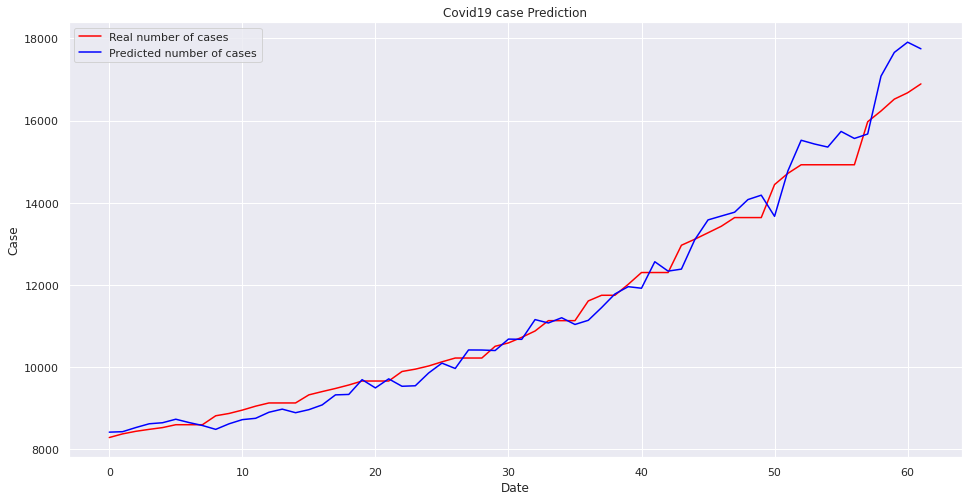

In [ ]:
def build_s_model(optimizer):
    model = Sequential()
    model.add(LSTM(128,return_sequences=True,input_shape=(1,13)))
    model.add(LSTM(96, return_sequences=True))
    model.add(LSTM(64, return_sequences=True))
    model.add(LSTM(32, return_sequences=True))
    model.add(LSTM(16))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer= optimizer)
    return model

grid_model_S = KerasRegressor(build_fn=build_s_model,verbose=1,validation_data=(testXS,testYS))

parameterS = {'batch_size' : [9,11],
              'epochs' : [50,100],
              'optimizer' : ['adam','Adadelta'] }
    
grid_search_S  = GridSearchCV(estimator = grid_model_S,
                            param_grid = parameterS,
                            cv = 2)

grid_search_S = grid_search.fit(trainXS,trainYS)

grid_search_S.best_params_

my_s_model=grid_search_S.best_estimator_.model

predictionS1 =my_s_model.predict(testXS)
print("prediction\n", predictionS1)
print("\nPrediction Shape-",predictionS1.shape)

prediction_copies_array_S1 = np.repeat(predictionS1,13, axis=-1)
prediction_copies_array_S1

predS1=scaler.inverse_transform(np.reshape(prediction_copies_array_S1,(len(predictionS1),13)))[:,0]

original_copies_array_S = np.repeat(testYS,13, axis=-1)
originalS=scaler.inverse_transform(np.reshape(original_copies_array_S,(len(testYS),13)))[:,0]

print("Pred Values-- " ,predS1)
print("\nOriginal Values-- " ,originalS)

plt.plot(originalS, color = 'red', label = 'Real number of cases')
plt.plot(predS1, color = 'blue', label = 'Predicted number of cases')
plt.title('Covid19 case Prediction')
plt.xlabel('Date')
plt.ylabel('Case')
plt.legend()
plt.show()

2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  del sys.path[0]


Epoch 1/50
15/15 [==============================] - 5s 79ms/step - loss: 0.3549 - val_loss: 1.1747
Epoch 2/50
15/15 [==============================] - 0s 8ms/step - loss: 0.0733 - val_loss: 0.2840
Epoch 3/50
15/15 [==============================] - 0s 7ms/step - loss: 0.0377 - val_loss: 0.5503
Epoch 4/50
15/15 [==============================] - 0s 7ms/step - loss: 0.0292 - val_loss: 0.4614
Epoch 5/50
15/15 [==============================] - 0s 8ms/step - loss: 0.0203 - val_loss: 0.3971
Epoch 6/50
15/15 [==============================] - 0s 8ms/step - loss: 0.0186 - val_loss: 0.4138
Epoch 7/50
15/15 [==============================] - 0s 9ms/step - loss: 0.0173 - val_loss: 0.3865
Epoch 8/50
15/15 [==============================] - 0s 8ms/step - loss: 0.0164 - val_loss: 0.3138
Epoch 9/50
15/15 [==============================] - 0s 7ms/step - loss: 0.0158 - val_loss: 0.3456
Epoch 10/50
15/15 [==============================] - 0s 8ms/step - loss: 0.0130 - val_loss: 0.2759
Epoch 11/50
15/15 

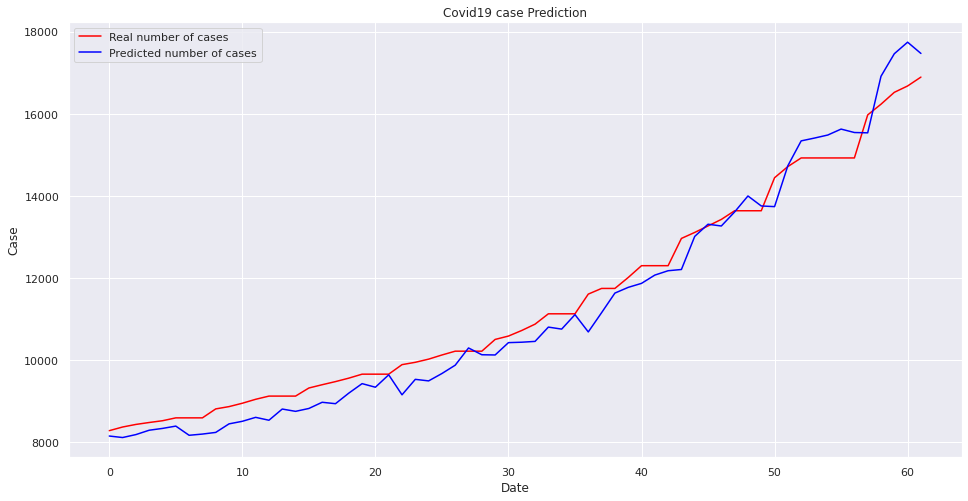

In [ ]:
def build_s_model(optimizer):
    model = Sequential()
    model.add(LSTM(128,return_sequences=True,input_shape=(1,13)))
    model.add(LSTM(96, return_sequences=True))
    model.add(LSTM(64, return_sequences=True))
    model.add(LSTM(32, return_sequences=True))
    model.add(LSTM(16))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer= optimizer)
    return model

grid_model_S = KerasRegressor(build_fn=build_s_model,verbose=1,validation_data=(testXS,testYS))

parameterS = {'batch_size' : [9,11],
              'epochs' : [50,100],
              'optimizer' : ['adam','Adadelta'] }
    
grid_search_S  = GridSearchCV(estimator = grid_model_S,
                            param_grid = parameterS,
                            cv = 2)

grid_search_S = grid_search.fit(trainXS2,trainYS2)

grid_search_S.best_params_

my_s_model=grid_search_S.best_estimator_.model

predictionS2 =my_s_model.predict(testXS2)
print("prediction\n", predictionS2)
print("\nPrediction Shape-",predictionS2.shape)

prediction_copies_array_S2 = np.repeat(predictionS2,13, axis=-1)
prediction_copies_array_S2

predS2=scaler.inverse_transform(np.reshape(prediction_copies_array_S2,(len(predictionS2),13)))[:,0]

original_copies_array_S = np.repeat(testYS2,13, axis=-1)
originalS=scaler.inverse_transform(np.reshape(original_copies_array_S,(len(testYS2),13)))[:,0]

print("Pred Values-- " ,predS2)
print("\nOriginal Values-- " ,originalS)

plt.plot(originalS, color = 'red', label = 'Real number of cases')
plt.plot(predS2, color = 'blue', label = 'Predicted number of cases')
plt.title('Covid19 case Prediction')
plt.xlabel('Date')
plt.ylabel('Case')
plt.legend()
plt.show()

3

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  del sys.path[0]


Epoch 1/50
15/15 [==============================] - 5s 78ms/step - loss: 0.3244 - val_loss: 1.0457
Epoch 2/50
15/15 [==============================] - 0s 9ms/step - loss: 0.0524 - val_loss: 0.3055
Epoch 3/50
15/15 [==============================] - 0s 8ms/step - loss: 0.0328 - val_loss: 0.5685
Epoch 4/50
15/15 [==============================] - 0s 7ms/step - loss: 0.0242 - val_loss: 0.4174
Epoch 5/50
15/15 [==============================] - 0s 7ms/step - loss: 0.0202 - val_loss: 0.4569
Epoch 6/50
15/15 [==============================] - 0s 7ms/step - loss: 0.0186 - val_loss: 0.4145
Epoch 7/50
15/15 [==============================] - 0s 8ms/step - loss: 0.0174 - val_loss: 0.3927
Epoch 8/50
15/15 [==============================] - 0s 8ms/step - loss: 0.0147 - val_loss: 0.3859
Epoch 9/50
15/15 [==============================] - 0s 8ms/step - loss: 0.0149 - val_loss: 0.3271
Epoch 10/50
15/15 [==============================] - 0s 9ms/step - loss: 0.0141 - val_loss: 0.3145
Epoch 11/50
15/15 

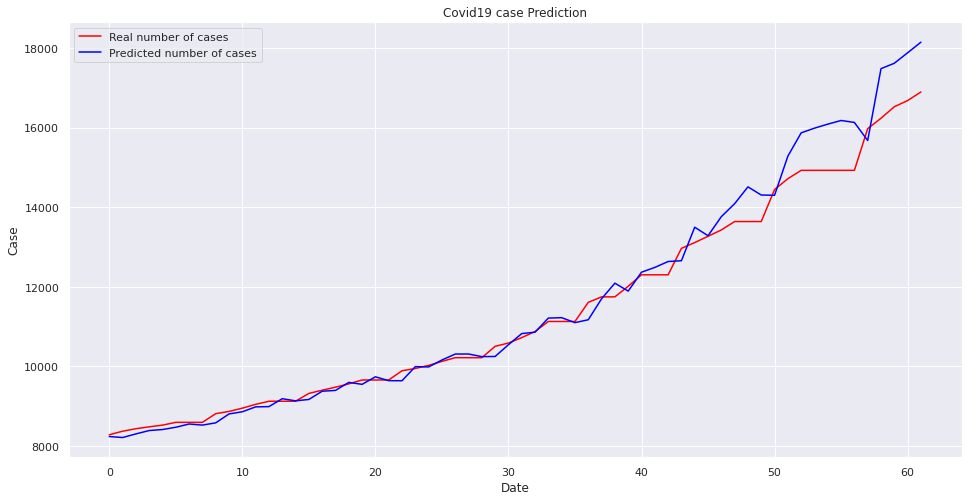

In [ ]:
def build_s_model(optimizer):
    model = Sequential()
    model.add(LSTM(128,return_sequences=True,input_shape=(1,13)))
    model.add(LSTM(96, return_sequences=True))
    model.add(LSTM(64, return_sequences=True))
    model.add(LSTM(32, return_sequences=True))
    model.add(LSTM(16))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer= optimizer)
    return model

grid_model_S = KerasRegressor(build_fn=build_s_model,verbose=1,validation_data=(testXS,testYS))

parameterS = {'batch_size' : [9,11],
              'epochs' : [50,100],
              'optimizer' : ['adam','Adadelta'] }
    
grid_search_S  = GridSearchCV(estimator = grid_model_S,
                            param_grid = parameterS,
                            cv = 2)

grid_search_S = grid_search.fit(trainXS3,trainYS3)

grid_search_S.best_params_

my_s_model=grid_search_S.best_estimator_.model

predictionS3 =my_s_model.predict(testXS3)
print("prediction\n", predictionS3)
print("\nPrediction Shape-",predictionS3.shape)

prediction_copies_array_S3 = np.repeat(predictionS3,13, axis=-1)
prediction_copies_array_S3

predS3=scaler.inverse_transform(np.reshape(prediction_copies_array_S3,(len(predictionS3),13)))[:,0]

original_copies_array_S = np.repeat(testYS3,13, axis=-1)
originalS=scaler.inverse_transform(np.reshape(original_copies_array_S,(len(testYS3),13)))[:,0]

print("Pred Values-- " ,predS3)
print("\nOriginal Values-- " ,originalS)

plt.plot(originalS, color = 'red', label = 'Real number of cases')
plt.plot(predS3, color = 'blue', label = 'Predicted number of cases')
plt.title('Covid19 case Prediction')
plt.xlabel('Date')
plt.ylabel('Case')
plt.legend()
plt.show()

4

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  del sys.path[0]


Epoch 1/50
15/15 [==============================] - 5s 76ms/step - loss: 0.3539 - val_loss: 1.1413
Epoch 2/50
15/15 [==============================] - 0s 7ms/step - loss: 0.0588 - val_loss: 0.2570
Epoch 3/50
15/15 [==============================] - 0s 8ms/step - loss: 0.0378 - val_loss: 0.5460
Epoch 4/50
15/15 [==============================] - 0s 7ms/step - loss: 0.0257 - val_loss: 0.3823
Epoch 5/50
15/15 [==============================] - 0s 8ms/step - loss: 0.0208 - val_loss: 0.4187
Epoch 6/50
15/15 [==============================] - 0s 7ms/step - loss: 0.0164 - val_loss: 0.3900
Epoch 7/50
15/15 [==============================] - 0s 7ms/step - loss: 0.0173 - val_loss: 0.3660
Epoch 8/50
15/15 [==============================] - 0s 8ms/step - loss: 0.0173 - val_loss: 0.3506
Epoch 9/50
15/15 [==============================] - 0s 7ms/step - loss: 0.0131 - val_loss: 0.3271
Epoch 10/50
15/15 [==============================] - 0s 8ms/step - loss: 0.0126 - val_loss: 0.2678
Epoch 11/50
15/15 

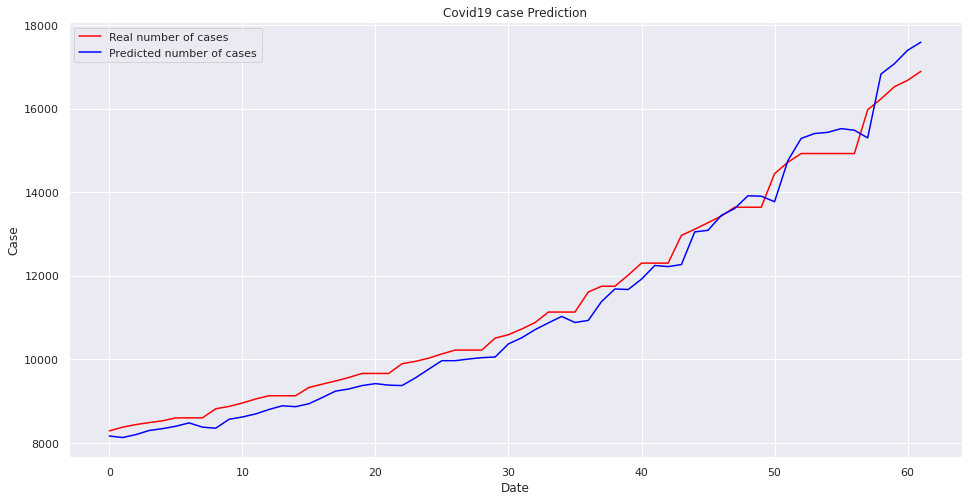

In [ ]:
def build_s_model(optimizer):
    model = Sequential()
    model.add(LSTM(128,return_sequences=True,input_shape=(1,13)))
    model.add(LSTM(96, return_sequences=True))
    model.add(LSTM(64, return_sequences=True))
    model.add(LSTM(32, return_sequences=True))
    model.add(LSTM(16))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer= optimizer)
    return model

grid_model_S = KerasRegressor(build_fn=build_s_model,verbose=1,validation_data=(testXS,testYS))

parameterS = {'batch_size' : [9,11],
              'epochs' : [50,100],
              'optimizer' : ['adam','Adadelta'] }
    
grid_search_S  = GridSearchCV(estimator = grid_model_S,
                            param_grid = parameterS,
                            cv = 2)

grid_search_S = grid_search.fit(trainXS4,trainYS4)

grid_search_S.best_params_

my_s_model=grid_search_S.best_estimator_.model

predictionS4 =my_s_model.predict(testXS4)
print("prediction\n", predictionS4)
print("\nPrediction Shape-",predictionS4.shape)

prediction_copies_array_S4 = np.repeat(predictionS4,13, axis=-1)
prediction_copies_array_S4

predS4=scaler.inverse_transform(np.reshape(prediction_copies_array_S4,(len(predictionS4),13)))[:,0]

original_copies_array_S = np.repeat(testYS4,13, axis=-1)
originalS=scaler.inverse_transform(np.reshape(original_copies_array_S,(len(testYS4),13)))[:,0]

print("Pred Values-- " ,predS4)
print("\nOriginal Values-- " ,originalS)

plt.plot(originalS, color = 'red', label = 'Real number of cases')
plt.plot(predS4, color = 'blue', label = 'Predicted number of cases')
plt.title('Covid19 case Prediction')
plt.xlabel('Date')
plt.ylabel('Case')
plt.legend()
plt.show()

5

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  del sys.path[0]


Epoch 1/50
15/15 [==============================] - 6s 80ms/step - loss: 0.3641 - val_loss: 1.2344
Epoch 2/50
15/15 [==============================] - 0s 8ms/step - loss: 0.0858 - val_loss: 0.3077
Epoch 3/50
15/15 [==============================] - 0s 8ms/step - loss: 0.0382 - val_loss: 0.5630
Epoch 4/50
15/15 [==============================] - 0s 8ms/step - loss: 0.0293 - val_loss: 0.4470
Epoch 5/50
15/15 [==============================] - 0s 7ms/step - loss: 0.0207 - val_loss: 0.4488
Epoch 6/50
15/15 [==============================] - 0s 8ms/step - loss: 0.0198 - val_loss: 0.4173
Epoch 7/50
15/15 [==============================] - 0s 8ms/step - loss: 0.0166 - val_loss: 0.4050
Epoch 8/50
15/15 [==============================] - 0s 8ms/step - loss: 0.0154 - val_loss: 0.3457
Epoch 9/50
15/15 [==============================] - 0s 8ms/step - loss: 0.0141 - val_loss: 0.3673
Epoch 10/50
15/15 [==============================] - 0s 8ms/step - loss: 0.0136 - val_loss: 0.3033
Epoch 11/50
15/15 

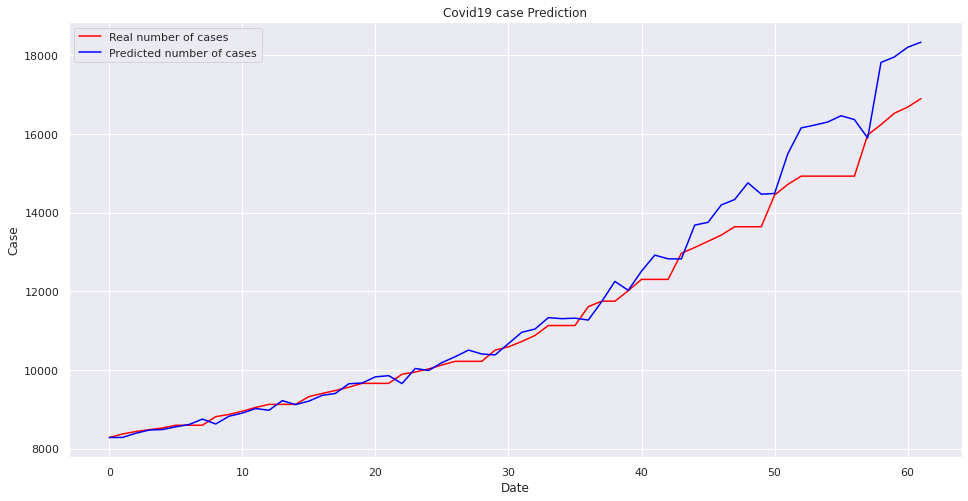

In [ ]:
def build_s_model(optimizer):
    model = Sequential()
    model.add(LSTM(128,return_sequences=True,input_shape=(1,13)))
    model.add(LSTM(96, return_sequences=True))
    model.add(LSTM(64, return_sequences=True))
    model.add(LSTM(32, return_sequences=True))
    model.add(LSTM(16))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer= optimizer)
    return model

grid_model_S = KerasRegressor(build_fn=build_s_model,verbose=1,validation_data=(testXS,testYS))

parameterS = {'batch_size' : [9,11],
              'epochs' : [50,100],
              'optimizer' : ['adam','Adadelta'] }
    
grid_search_S  = GridSearchCV(estimator = grid_model_S,
                            param_grid = parameterS,
                            cv = 2)

grid_search_S = grid_search.fit(trainXS5,trainYS5)

grid_search_S.best_params_

my_s_model=grid_search_S.best_estimator_.model

predictionS5 =my_s_model.predict(testXS5)
print("prediction\n", predictionS5)
print("\nPrediction Shape-",predictionS5.shape)

prediction_copies_array_S5 = np.repeat(predictionS5,13, axis=-1)
prediction_copies_array_S5

predS5=scaler.inverse_transform(np.reshape(prediction_copies_array_S5,(len(predictionS5),13)))[:,0]

original_copies_array_S = np.repeat(testYS5,13, axis=-1)
originalS=scaler.inverse_transform(np.reshape(original_copies_array_S,(len(testYS5),13)))[:,0]

print("Pred Values-- " ,predS5)
print("\nOriginal Values-- " ,originalS)

plt.plot(originalS, color = 'red', label = 'Real number of cases')
plt.plot(predS5, color = 'blue', label = 'Predicted number of cases')
plt.title('Covid19 case Prediction')
plt.xlabel('Date')
plt.ylabel('Case')
plt.legend()
plt.show()

Average of 5 Stacked-LSTM runs

In [ ]:
predslstm = (predS1+predS2+predS3+predS4+predS5)/5
print(predslstm)

[ 8249.576   8232.912   8320.955   8413.303   8443.641   8508.897
  8491.756   8485.213   8455.737   8651.43    8721.954   8810.141
  8839.303   9015.247   8951.801   9019.15    9172.77    9259.5205
  9412.7     9541.329   9562.142   9646.134   9469.906   9731.713
  9816.322  10016.4795 10090.773  10306.5    10246.471  10242.615
 10537.639  10680.978  10844.004  11058.035  11101.491  11087.839
 11038.764  11483.419  11886.823  11862.627  12116.253  12456.917
 12437.906  12467.095  13267.588  13402.611  13668.955  13881.119
 14250.844  14123.005  13992.411  15008.273  15633.356  15689.997
 15731.719  15904.646  15816.891  15615.989  17224.27   17553.014
 17825.691  17856.73  ]


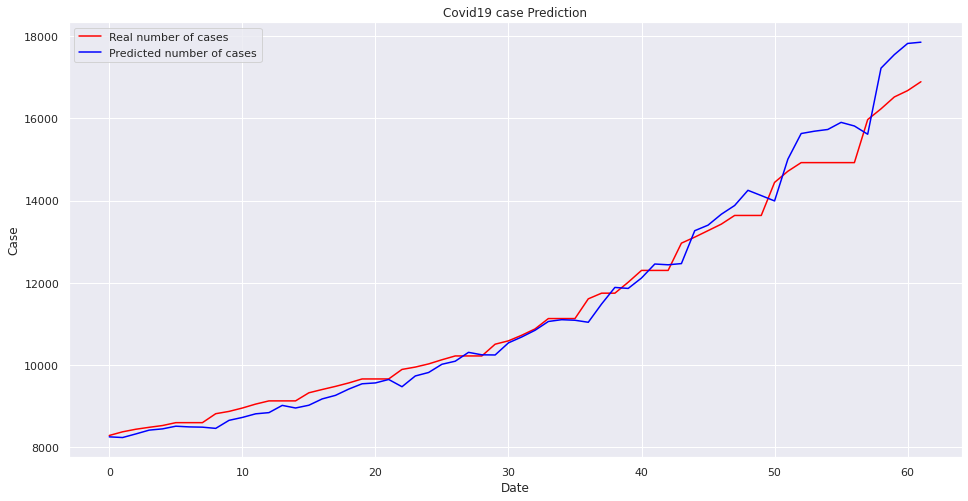

In [ ]:
plt.plot(originalS, color = 'red', label = 'Real number of cases')
plt.plot(predslstm, color = 'blue', label = 'Predicted number of cases')
plt.title('Covid19 case Prediction')
plt.xlabel('Date')
plt.ylabel('Case')
plt.legend()
plt.show()

In [ ]:
print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(originalS, predslstm)))
print("MAE:",metrics.mean_absolute_error(originalS, predslstm))
print("MSE:",metrics.mean_squared_error(originalS, predslstm))
print("MAPE: ",MAPE(originalS,predslstm))

forecast_errors = [originalS[i]-predslstm[i] for i in range(len(originalS))]
print('Forecast Errors: %s' % forecast_errors)
bias = sum(forecast_errors) * 1.0/len(originalS)
print('Bias: %f' % bias)

print("std of LSTM : ", np.std(predslstm))

RMSE : 418
MAE: 299.18329448084677
MSE: 174686.61661288046
MAPE:  2.3641570613717966
Forecast Errors: [33.423828125, 139.087890625, 114.044921875, 68.697265625, 81.359375, 86.1025390625, 103.244140625, 109.787109375, 357.2626953125, 217.5703125, 229.0458984375, 236.859375, 285.697265625, 109.7529296875, 173.19921875, 302.849609375, 229.23046875, 218.4794921875, 149.2998046875, 117.6708984375, 96.8583984375, 12.8662109375, 421.09375, 216.287109375, 208.677734375, 109.5205078125, 128.2265625, -87.5, -27.470703125, 262.384765625, 49.361328125, 42.0224609375, 32.99609375, 70.96484375, 27.5087890625, 41.1611328125, 570.236328125, 263.5810546875, -139.8232421875, 150.373046875, 184.7470703125, -155.9169921875, -136.90625, 497.9052734375, -156.587890625, -133.611328125, -240.955078125, -242.119140625, -611.84375, -484.0048828125, 450.5888671875, -293.2734375, -708.3564453125, -764.9970703125, -806.71875, -979.646484375, -891.890625, 357.0107421875, -990.26953125, -1030.013671875, -1147.691406

Bidirectional LSTM

1

In [ ]:
from keras.layers import TimeDistributed
from keras.layers import Bidirectional

In [ ]:
trainXB2=trainXB3=trainXB4=trainXB5=trainXB
trainYB2=trainYB3=trainYB4=trainYB5=trainYB
testXB2=testXB3=testXB4=testXB5=testXB
testYB2=testYB3=testYB4=testYB5=testYB

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  if __name__ == '__main__':


Epoch 1/50
15/15 [==============================] - 5s 75ms/step - loss: 0.3551 - val_loss: 1.1574
Epoch 2/50
15/15 [==============================] - 0s 8ms/step - loss: 0.0675 - val_loss: 0.2790
Epoch 3/50
15/15 [==============================] - 0s 7ms/step - loss: 0.0374 - val_loss: 0.5301
Epoch 4/50
15/15 [==============================] - 0s 8ms/step - loss: 0.0214 - val_loss: 0.4332
Epoch 5/50
15/15 [==============================] - 0s 7ms/step - loss: 0.0210 - val_loss: 0.4373
Epoch 6/50
15/15 [==============================] - 0s 8ms/step - loss: 0.0186 - val_loss: 0.3928
Epoch 7/50
15/15 [==============================] - 0s 9ms/step - loss: 0.0165 - val_loss: 0.4072
Epoch 8/50
15/15 [==============================] - 0s 8ms/step - loss: 0.0157 - val_loss: 0.3643
Epoch 9/50
15/15 [==============================] - 0s 8ms/step - loss: 0.0133 - val_loss: 0.3488
Epoch 10/50
15/15 [==============================] - 0s 8ms/step - loss: 0.0136 - val_loss: 0.2762
Epoch 11/50
15/15 

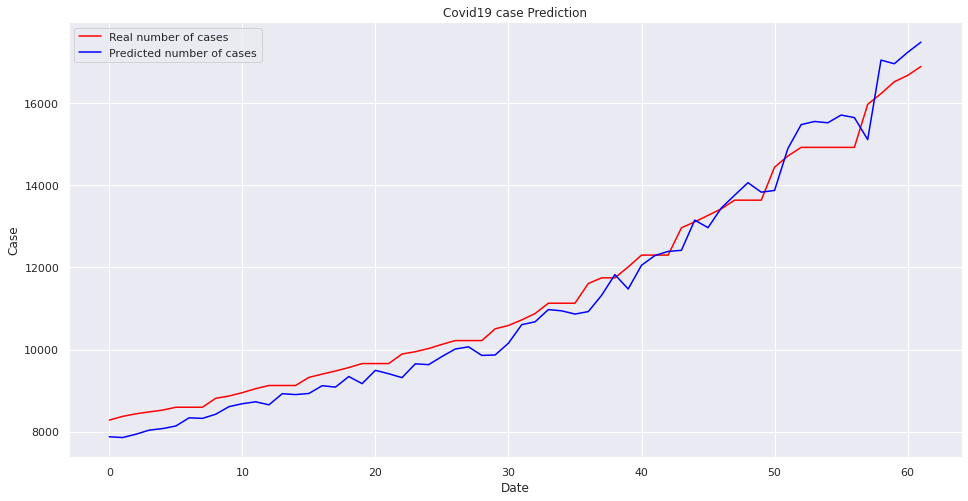

In [ ]:
def build_B_model(optimizer):
    Bmodel = Sequential()
    Bmodel.add(Bidirectional(LSTM(16),input_shape=(1,13)))
    Bmodel.add(Dropout(0.2))
    Bmodel.add(Dense(1))
    Bmodel.compile(loss='mean_squared_error', optimizer= optimizer)
    return Bmodel

grid_model_B = KerasRegressor(build_fn=build_B_model,verbose=1,validation_data=(testXB,testYB))

parameterB = {'batch_size' : [9,11],
              'epochs' : [50,100],
              'optimizer' : ['adam','Adadelta'] }
    
grid_search_B  = GridSearchCV(estimator = grid_model_B,
                            param_grid = parameterB,
                            cv = 2)

grid_search_B = grid_search.fit(trainXB,trainYB)

grid_search_B.best_params_

my_B_model=grid_search_B.best_estimator_.model

predictionB1 =my_B_model.predict(testXB)
print("prediction\n", predictionB1)
print("\nPrediction Shape-",predictionB1.shape)

prediction_copies_array_B1 = np.repeat(predictionB1,13, axis=-1)
prediction_copies_array_B1

predB1 =scaler.inverse_transform(np.reshape(prediction_copies_array_B1,(len(predictionB1),13)))[:,0]

original_copies_array_B = np.repeat(testYB,13, axis=-1)
originalB=scaler.inverse_transform(np.reshape(original_copies_array_B,(len(testYB),13)))[:,0]

print("Pred Values-- " ,predB1)
print("\nOriginal Values-- " ,originalB)

plt.plot(originalB, color = 'red', label = 'Real number of cases')
plt.plot(predB1, color = 'blue', label = 'Predicted number of cases')
plt.title('Covid19 case Prediction')
plt.xlabel('Date')
plt.ylabel('Case')
plt.legend()
plt.show()

2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  if __name__ == '__main__':


Epoch 1/50
15/15 [==============================] - 5s 77ms/step - loss: 0.3448 - val_loss: 1.1504
Epoch 2/50
15/15 [==============================] - 0s 7ms/step - loss: 0.0593 - val_loss: 0.2985
Epoch 3/50
15/15 [==============================] - 0s 7ms/step - loss: 0.0398 - val_loss: 0.5785
Epoch 4/50
15/15 [==============================] - 0s 8ms/step - loss: 0.0275 - val_loss: 0.4666
Epoch 5/50
15/15 [==============================] - 0s 8ms/step - loss: 0.0251 - val_loss: 0.4462
Epoch 6/50
15/15 [==============================] - 0s 7ms/step - loss: 0.0202 - val_loss: 0.4136
Epoch 7/50
15/15 [==============================] - 0s 8ms/step - loss: 0.0200 - val_loss: 0.4089
Epoch 8/50
15/15 [==============================] - 0s 8ms/step - loss: 0.0167 - val_loss: 0.3796
Epoch 9/50
15/15 [==============================] - 0s 8ms/step - loss: 0.0157 - val_loss: 0.3367
Epoch 10/50
15/15 [==============================] - 0s 8ms/step - loss: 0.0133 - val_loss: 0.2957
Epoch 11/50
15/15 

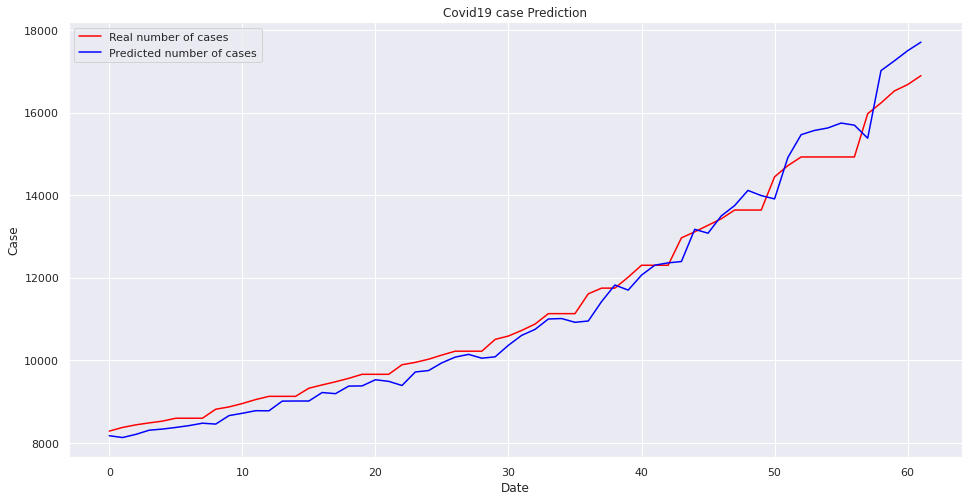

In [ ]:
def build_B_model(optimizer):
    Bmodel = Sequential()
    Bmodel.add(Bidirectional(LSTM(16),input_shape=(1,13)))
    Bmodel.add(Dropout(0.2))
    Bmodel.add(Dense(1))
    Bmodel.compile(loss='mean_squared_error', optimizer= optimizer)
    return Bmodel

grid_model_B = KerasRegressor(build_fn=build_B_model,verbose=1,validation_data=(testXB,testYB))

parameterB = {'batch_size' : [9,11],
              'epochs' : [50,100],
              'optimizer' : ['adam','Adadelta'] }
    
grid_search_B  = GridSearchCV(estimator = grid_model_B,
                            param_grid = parameterB,
                            cv = 2)

grid_search_B = grid_search.fit(trainXB2,trainYB2)

grid_search_B.best_params_

my_B_model=grid_search_B.best_estimator_.model

predictionB2 =my_B_model.predict(testXB2)
print("prediction\n", predictionB2)
print("\nPrediction Shape-",predictionB2.shape)

prediction_copies_array_B2 = np.repeat(predictionB2,13, axis=-1)
prediction_copies_array_B2

predB2 =scaler.inverse_transform(np.reshape(prediction_copies_array_B2,(len(predictionB2),13)))[:,0]

original_copies_array_B = np.repeat(testYB2,13, axis=-1)
originalB=scaler.inverse_transform(np.reshape(original_copies_array_B,(len(testYB2),13)))[:,0]

print("Pred Values-- " ,predB2)
print("\nOriginal Values-- " ,originalB)

plt.plot(originalB, color = 'red', label = 'Real number of cases')
plt.plot(predB2, color = 'blue', label = 'Predicted number of cases')
plt.title('Covid19 case Prediction')
plt.xlabel('Date')
plt.ylabel('Case')
plt.legend()
plt.show()

3

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  if __name__ == '__main__':


Epoch 1/50
15/15 [==============================] - 5s 76ms/step - loss: 0.3342 - val_loss: 1.0951
Epoch 2/50
15/15 [==============================] - 0s 7ms/step - loss: 0.0652 - val_loss: 0.3057
Epoch 3/50
15/15 [==============================] - 0s 8ms/step - loss: 0.0331 - val_loss: 0.5915
Epoch 4/50
15/15 [==============================] - 0s 8ms/step - loss: 0.0270 - val_loss: 0.4375
Epoch 5/50
15/15 [==============================] - 0s 8ms/step - loss: 0.0210 - val_loss: 0.4498
Epoch 6/50
15/15 [==============================] - 0s 7ms/step - loss: 0.0185 - val_loss: 0.4339
Epoch 7/50
15/15 [==============================] - 0s 8ms/step - loss: 0.0169 - val_loss: 0.3922
Epoch 8/50
15/15 [==============================] - 0s 8ms/step - loss: 0.0142 - val_loss: 0.3463
Epoch 9/50
15/15 [==============================] - 0s 7ms/step - loss: 0.0136 - val_loss: 0.3461
Epoch 10/50
15/15 [==============================] - 0s 7ms/step - loss: 0.0107 - val_loss: 0.2544
Epoch 11/50
15/15 

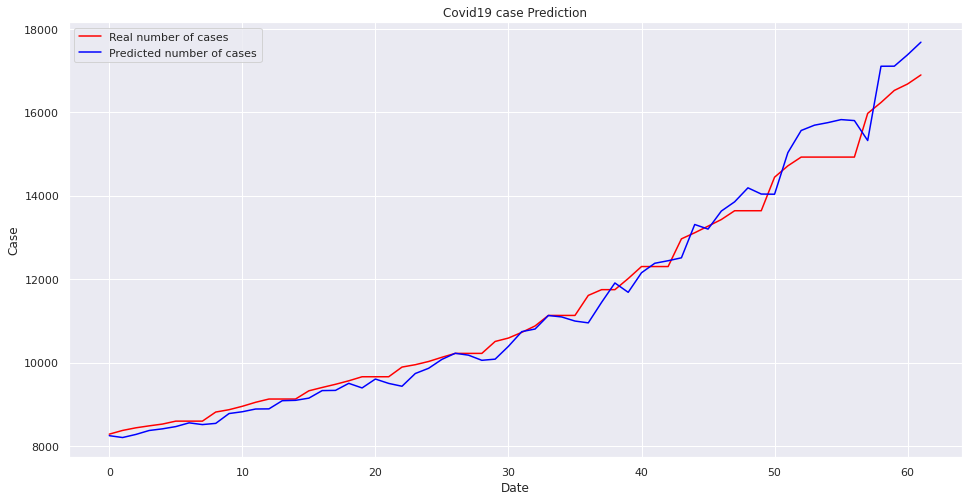

In [ ]:
def build_B_model(optimizer):
    Bmodel = Sequential()
    Bmodel.add(Bidirectional(LSTM(16),input_shape=(1,13)))
    Bmodel.add(Dropout(0.2))
    Bmodel.add(Dense(1))
    Bmodel.compile(loss='mean_squared_error', optimizer= optimizer)
    return Bmodel

grid_model_B = KerasRegressor(build_fn=build_B_model,verbose=1,validation_data=(testXB,testYB))

parameterB = {'batch_size' : [9,11],
              'epochs' : [50,100],
              'optimizer' : ['adam','Adadelta'] }
    
grid_search_B  = GridSearchCV(estimator = grid_model_B,
                            param_grid = parameterB,
                            cv = 2)

grid_search_B = grid_search.fit(trainXB3,trainYB3)

grid_search_B.best_params_

my_B_model=grid_search_B.best_estimator_.model

predictionB3 =my_B_model.predict(testXB3)
print("prediction\n", predictionB3)
print("\nPrediction Shape-",predictionB3.shape)

prediction_copies_array_B3 = np.repeat(predictionB3,13, axis=-1)
prediction_copies_array_B3

predB3 =scaler.inverse_transform(np.reshape(prediction_copies_array_B3,(len(predictionB3),13)))[:,0]

original_copies_array_B = np.repeat(testYB3,13, axis=-1)
originalB=scaler.inverse_transform(np.reshape(original_copies_array_B,(len(testYB3),13)))[:,0]

print("Pred Values-- " ,predB3)
print("\nOriginal Values-- " ,originalB)

plt.plot(originalB, color = 'red', label = 'Real number of cases')
plt.plot(predB3, color = 'blue', label = 'Predicted number of cases')
plt.title('Covid19 case Prediction')
plt.xlabel('Date')
plt.ylabel('Case')
plt.legend()
plt.show()

4

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  if __name__ == '__main__':


Epoch 1/50
15/15 [==============================] - 5s 79ms/step - loss: 0.3374 - val_loss: 1.1000
Epoch 2/50
15/15 [==============================] - 0s 7ms/step - loss: 0.0667 - val_loss: 0.3069
Epoch 3/50
15/15 [==============================] - 0s 9ms/step - loss: 0.0337 - val_loss: 0.5419
Epoch 4/50
15/15 [==============================] - 0s 8ms/step - loss: 0.0261 - val_loss: 0.4229
Epoch 5/50
15/15 [==============================] - 0s 7ms/step - loss: 0.0222 - val_loss: 0.4439
Epoch 6/50
15/15 [==============================] - 0s 8ms/step - loss: 0.0195 - val_loss: 0.4159
Epoch 7/50
15/15 [==============================] - 0s 7ms/step - loss: 0.0191 - val_loss: 0.4057
Epoch 8/50
15/15 [==============================] - 0s 8ms/step - loss: 0.0154 - val_loss: 0.3586
Epoch 9/50
15/15 [==============================] - 0s 8ms/step - loss: 0.0155 - val_loss: 0.3715
Epoch 10/50
15/15 [==============================] - 0s 7ms/step - loss: 0.0133 - val_loss: 0.3028
Epoch 11/50
15/15 

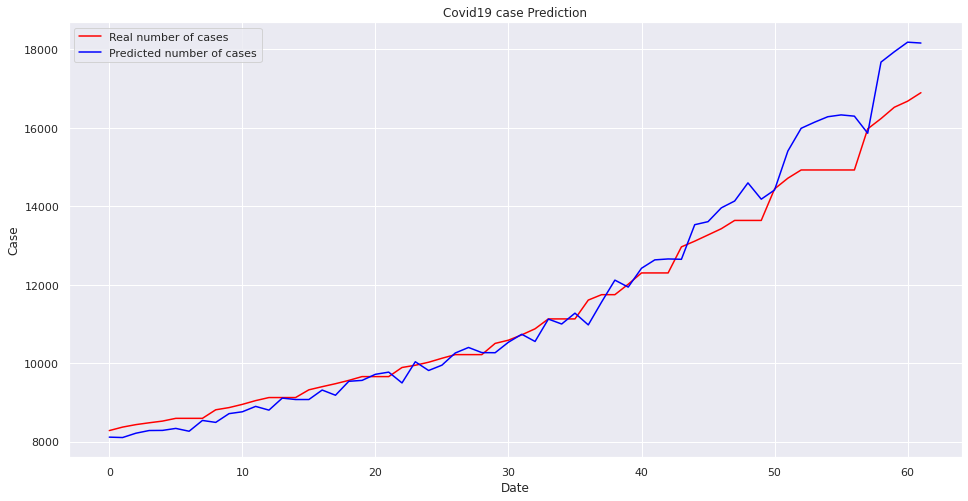

In [ ]:
def build_B_model(optimizer):
    Bmodel = Sequential()
    Bmodel.add(Bidirectional(LSTM(16),input_shape=(1,13)))
    Bmodel.add(Dropout(0.2))
    Bmodel.add(Dense(1))
    Bmodel.compile(loss='mean_squared_error', optimizer= optimizer)
    return Bmodel

grid_model_B = KerasRegressor(build_fn=build_B_model,verbose=1,validation_data=(testXB,testYB))

parameterB = {'batch_size' : [9,11],
              'epochs' : [50,100],
              'optimizer' : ['adam','Adadelta'] }
    
grid_search_B  = GridSearchCV(estimator = grid_model_B,
                            param_grid = parameterB,
                            cv = 2)

grid_search_B = grid_search.fit(trainXB4,trainYB4)

grid_search_B.best_params_

my_B_model=grid_search_B.best_estimator_.model

predictionB4 =my_B_model.predict(testXB4)
print("prediction\n", predictionB4)
print("\nPrediction Shape-",predictionB4.shape)

prediction_copies_array_B4 = np.repeat(predictionB4,13, axis=-1)
prediction_copies_array_B4

predB4 =scaler.inverse_transform(np.reshape(prediction_copies_array_B4,(len(predictionB4),13)))[:,0]

original_copies_array_B = np.repeat(testYB4,13, axis=-1)
originalB=scaler.inverse_transform(np.reshape(original_copies_array_B,(len(testYB4),13)))[:,0]

print("Pred Values-- " ,predB4)
print("\nOriginal Values-- " ,originalB)

plt.plot(originalB, color = 'red', label = 'Real number of cases')
plt.plot(predB4, color = 'blue', label = 'Predicted number of cases')
plt.title('Covid19 case Prediction')
plt.xlabel('Date')
plt.ylabel('Case')
plt.legend()
plt.show()

5

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  if __name__ == '__main__':


Epoch 1/50
15/15 [==============================] - 5s 74ms/step - loss: 0.3432 - val_loss: 1.1074
Epoch 2/50
15/15 [==============================] - 0s 7ms/step - loss: 0.0603 - val_loss: 0.2786
Epoch 3/50
15/15 [==============================] - 0s 9ms/step - loss: 0.0354 - val_loss: 0.5380
Epoch 4/50
15/15 [==============================] - 0s 8ms/step - loss: 0.0278 - val_loss: 0.4267
Epoch 5/50
15/15 [==============================] - 0s 7ms/step - loss: 0.0264 - val_loss: 0.4147
Epoch 6/50
15/15 [==============================] - 0s 8ms/step - loss: 0.0202 - val_loss: 0.4066
Epoch 7/50
15/15 [==============================] - 0s 8ms/step - loss: 0.0183 - val_loss: 0.3887
Epoch 8/50
15/15 [==============================] - 0s 8ms/step - loss: 0.0167 - val_loss: 0.3357
Epoch 9/50
15/15 [==============================] - 0s 8ms/step - loss: 0.0151 - val_loss: 0.3251
Epoch 10/50
15/15 [==============================] - 0s 8ms/step - loss: 0.0138 - val_loss: 0.2857
Epoch 11/50
15/15 

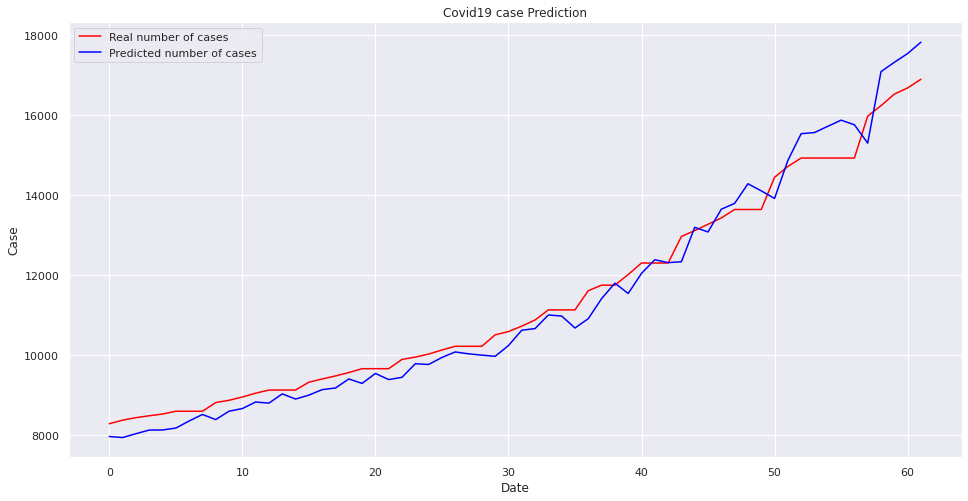

In [ ]:
def build_B_model(optimizer):
    Bmodel = Sequential()
    Bmodel.add(Bidirectional(LSTM(16),input_shape=(1,13)))
    Bmodel.add(Dropout(0.2))
    Bmodel.add(Dense(1))
    Bmodel.compile(loss='mean_squared_error', optimizer= optimizer)
    return Bmodel

grid_model_B = KerasRegressor(build_fn=build_B_model,verbose=1,validation_data=(testXB,testYB))

parameterB = {'batch_size' : [9,11],
              'epochs' : [50,100],
              'optimizer' : ['adam','Adadelta'] }
    
grid_search_B  = GridSearchCV(estimator = grid_model_B,
                            param_grid = parameterB,
                            cv = 2)

grid_search_B = grid_search.fit(trainXB5,trainYB5)

grid_search_B.best_params_

my_B_model=grid_search_B.best_estimator_.model

predictionB5 =my_B_model.predict(testXB5)
print("prediction\n", predictionB5)
print("\nPrediction Shape-",predictionB5.shape)

prediction_copies_array_B5 = np.repeat(predictionB5,13, axis=-1)
prediction_copies_array_B5

predB5 =scaler.inverse_transform(np.reshape(prediction_copies_array_B5,(len(predictionB5),13)))[:,0]

original_copies_array_B = np.repeat(testYB5,13, axis=-1)
originalB=scaler.inverse_transform(np.reshape(original_copies_array_B,(len(testYB5),13)))[:,0]

print("Pred Values-- " ,predB5)
print("\nOriginal Values-- " ,originalB)

plt.plot(originalB, color = 'red', label = 'Real number of cases')
plt.plot(predB5, color = 'blue', label = 'Predicted number of cases')
plt.title('Covid19 case Prediction')
plt.xlabel('Date')
plt.ylabel('Case')
plt.legend()
plt.show()

Average of 5 Bi-LSTM runs

In [ ]:
predblstm = (predB1+predB2+predB3+predB4+predB5)/5
print(predblstm)

[ 8074.8022  8046.1455  8133.569   8224.533   8246.754   8297.327
  8385.119   8473.184   8459.674   8671.474   8728.158   8823.291
  8784.213   9031.847   8996.912   9032.342   9223.109   9193.582
  9431.771   9358.6875  9576.356   9511.854   9415.371   9785.049
  9764.745   9946.685  10129.693  10163.339  10045.661  10053.683
 10335.751  10661.894  10688.593  11045.506  11004.177  10945.819
 10942.626  11430.844  11894.002  11667.658  12145.77   12397.486
 12431.711  12460.235  13271.303  13186.248  13636.956  13856.958
 14248.901  14029.678  14029.519  15022.148  15605.822  15703.356
 15780.322  15896.51   15839.958  15395.036  17185.98   17314.799
 17567.002  17770.771 ]


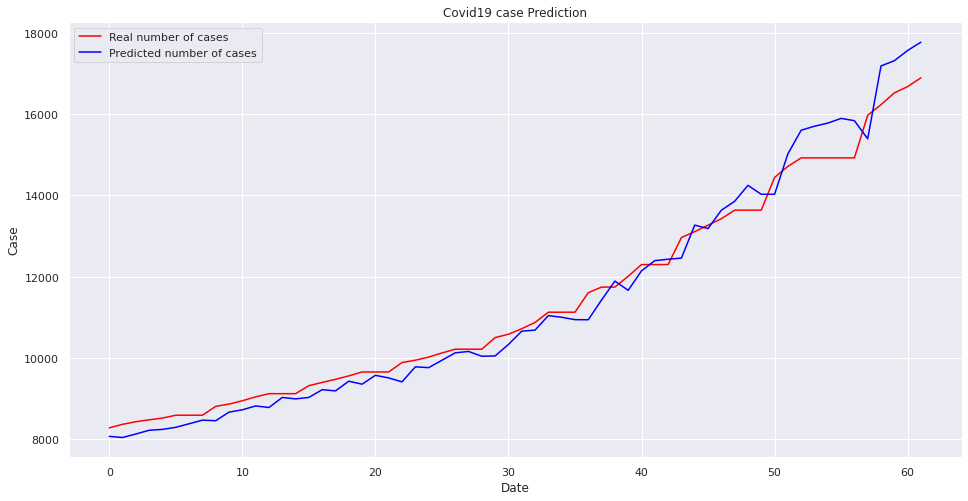

In [ ]:
plt.plot(originalB, color = 'red', label = 'Real number of cases')
plt.plot(predblstm, color = 'blue', label = 'Predicted number of cases')
plt.title('Covid19 case Prediction')
plt.xlabel('Date')
plt.ylabel('Case')
plt.legend()
plt.show()

In [ ]:
print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(originalB, predblstm)))
print("MAE:",metrics.mean_absolute_error(originalB, predblstm))
print("MSE:",metrics.mean_squared_error(originalB, predblstm))
print("MAPE: ",MAPE(originalB,predblstm))

forecast_errors = [originalB[i]-predblstm[i] for i in range(len(originalB))]
print('Forecast Errors: %s' % forecast_errors)
bias = sum(forecast_errors) * 1.0/len(originalB)
print('Bias: %f' % bias)

print("std of LSTM : ", np.std(predblstm))

RMSE : 420
MAE: 334.759041078629
MSE: 176399.12535249803
MAPE:  2.7746176780116394
Forecast Errors: [208.19775390625, 325.8544921875, 301.43115234375, 257.466796875, 278.24609375, 297.6728515625, 209.880859375, 121.81640625, 353.326171875, 197.5263671875, 222.841796875, 223.708984375, 340.787109375, 93.1533203125, 128.087890625, 289.658203125, 178.890625, 284.41796875, 130.228515625, 300.3125, 82.6435546875, 147.146484375, 475.62890625, 162.951171875, 260.2548828125, 179.3154296875, 89.306640625, 55.6611328125, 173.3388671875, 451.3173828125, 251.2490234375, 61.1064453125, 188.4072265625, 83.494140625, 124.8232421875, 183.1806640625, 666.3740234375, 316.15625, -147.001953125, 345.341796875, 155.23046875, -96.486328125, -130.7109375, 504.7646484375, -160.302734375, 82.751953125, -208.9560546875, -217.9580078125, -609.9013671875, -390.677734375, 413.4814453125, -307.1484375, -680.822265625, -778.3564453125, -855.322265625, -971.509765625, -914.9580078125, 577.9638671875, -951.98046875, -